In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_snr_data import CCSNSNRData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction_distribution, plot_candidate_signal

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


MPS device found


/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

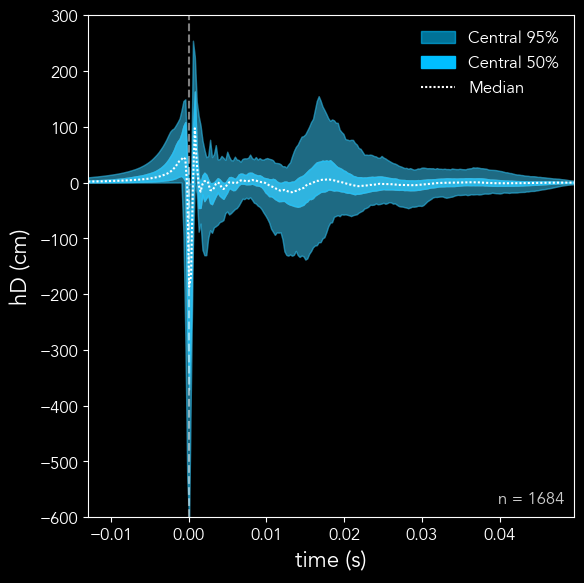

In [4]:
ccsn_dataset = CCSNSNRData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

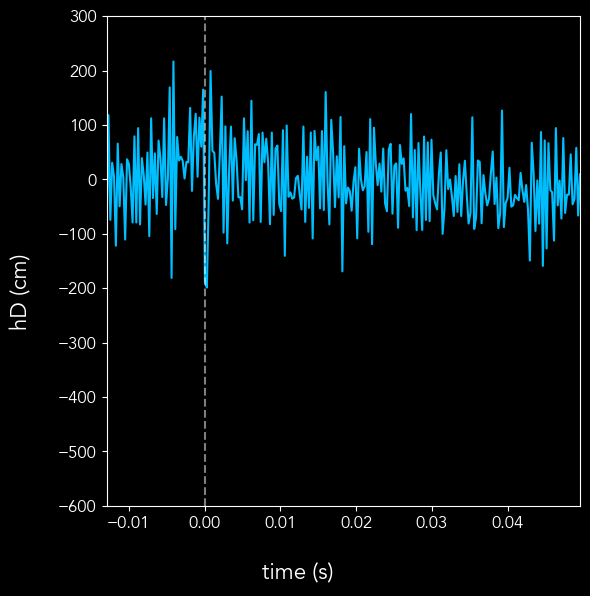

In [5]:
ccsn_dataset.plot_signal_grid(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.png")


=== Data Split (on base signals) ===
Total base signals: 1684
Training base signals: 1516
Validation base signals: 168
First 5 training indices: [ 360  336   81  684 1374]
First 5 validation indices: [722 519 222  32 111]
✓ Verification PASSED: No overlap between train and validation sets
  Train signals: 1516 unique indices
  Val signals: 168 unique indices
  Total coverage: 1684 / 1684

Verifying data alignment:
Number of signals: 1516
Number of parameter sets: 1516
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', 'A(km)', 'Ye_c_b']
First few parameter values:
      beta1_IC_b  omega_0(rad|s)  A(km)   Ye_c_b
369     0.144352             8.5    467  0.26472
345     0.121586            10.0    300  0.26472
84      0.172129            12.5    300  0.27792
708     0.001442             1.0    300  0.28282
1447    0.047885             4.0    634  0.28170

Verifying data alignment:
Number of signals: 168
Number of parameter sets: 168
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', '

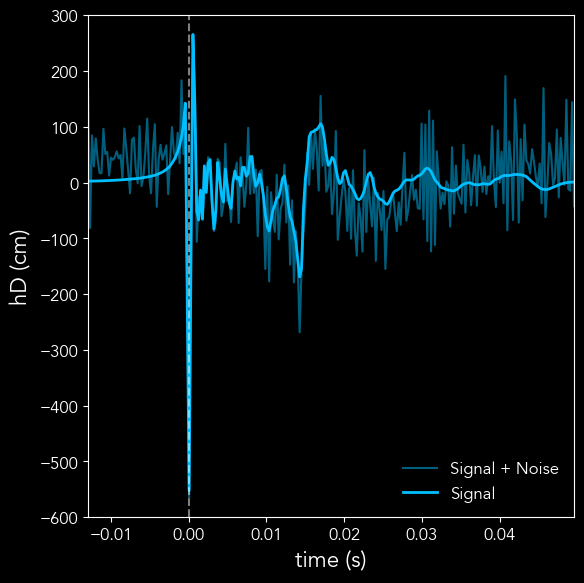

In [6]:
trainer = Trainer(
    toy=False, 
    start_snr=200,
    end_snr=10,
    noise=True, 
    validation_split=0.1,
    curriculum=True,
    noise_realizations=1
)

trainer.plot_candidate_signal(
    snr=30,
    index=60,
    background="black",
    fname="plots/ccsn_candidate_signal.png"
)

Epochs:   6%|▌         | 15/256 [00:37<09:10,  2.28s/it]

Generated signals shape: (32, 256)


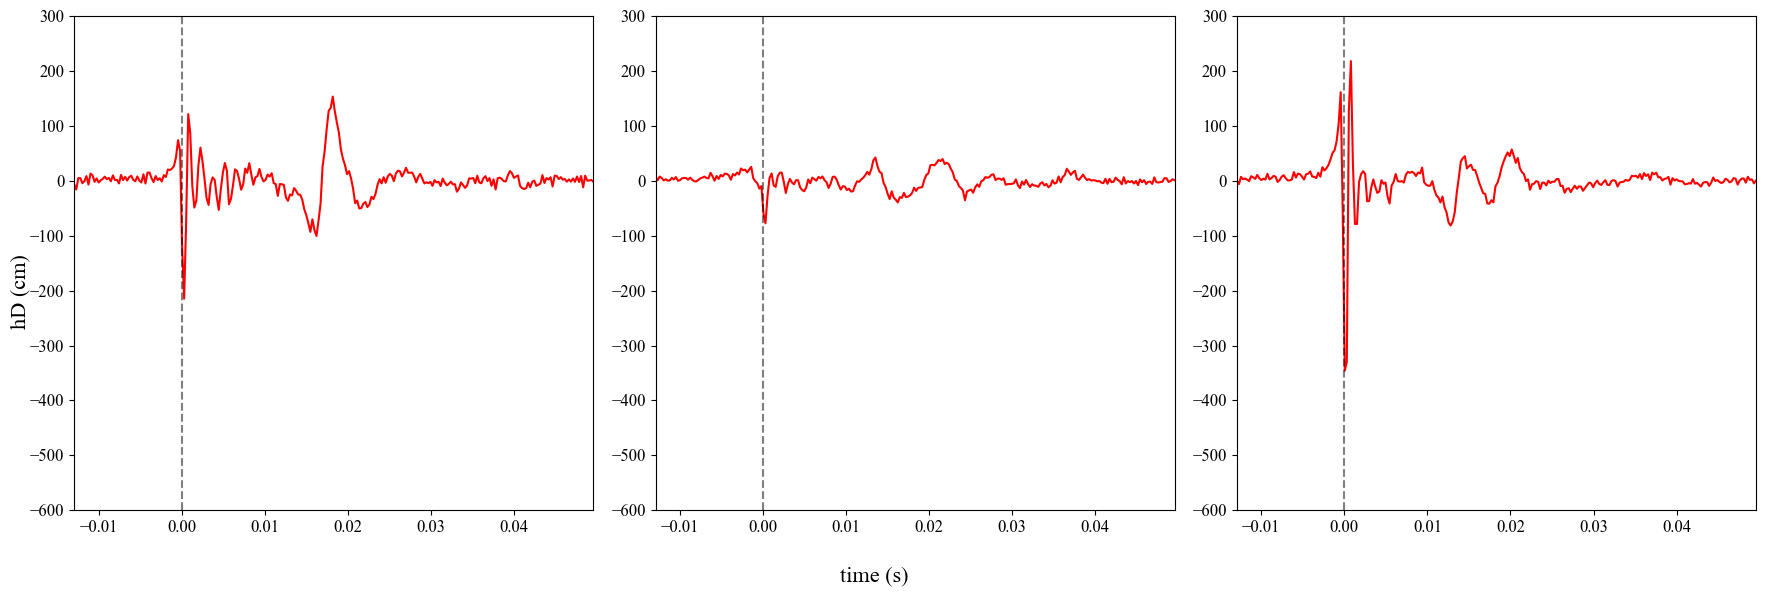

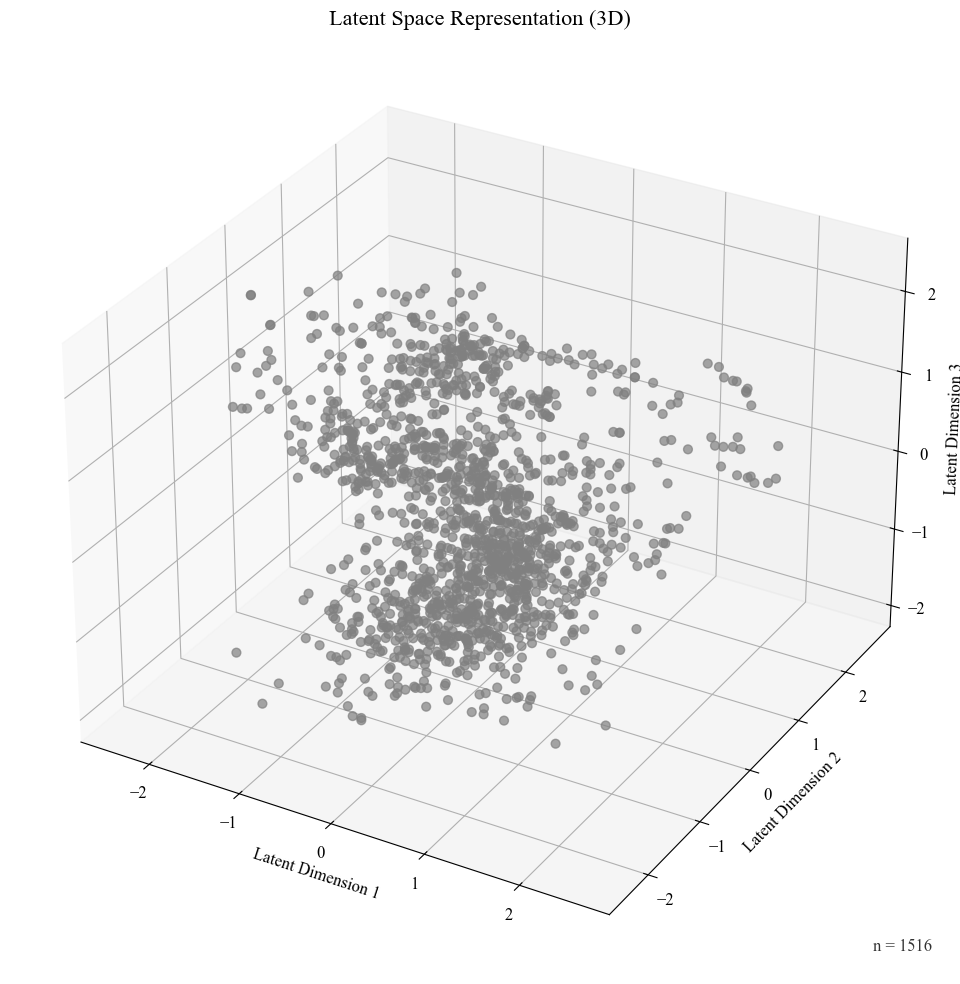

Epochs:  12%|█▏        | 31/256 [01:16<08:56,  2.39s/it]

Generated signals shape: (32, 256)


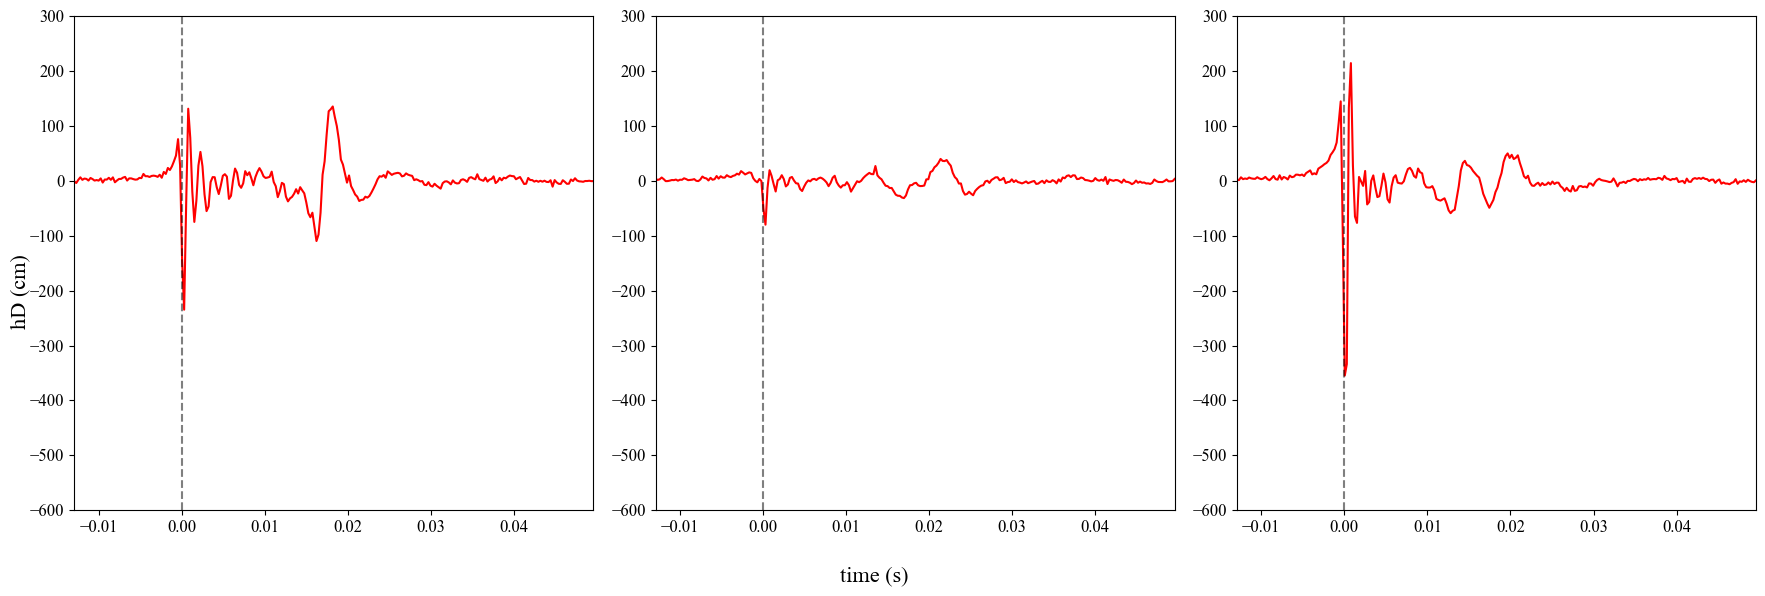

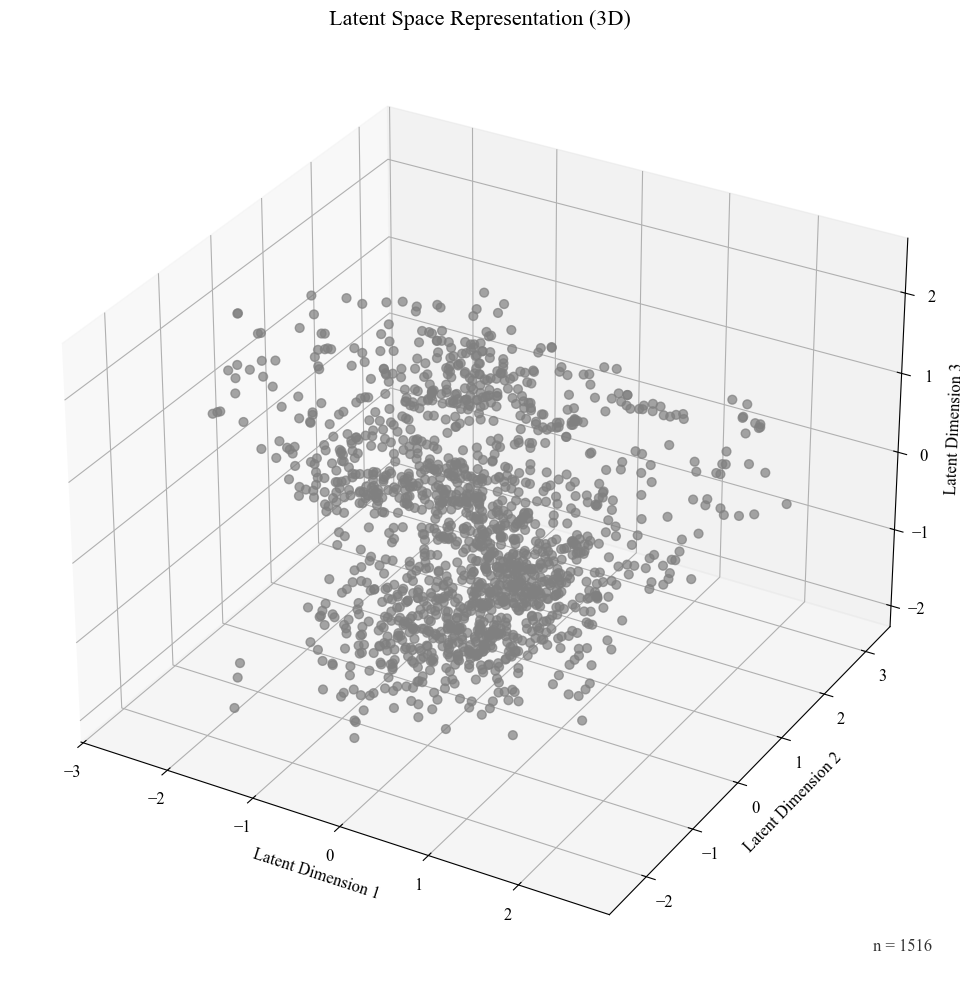

Epochs:  18%|█▊        | 47/256 [01:56<08:14,  2.36s/it]

Generated signals shape: (32, 256)


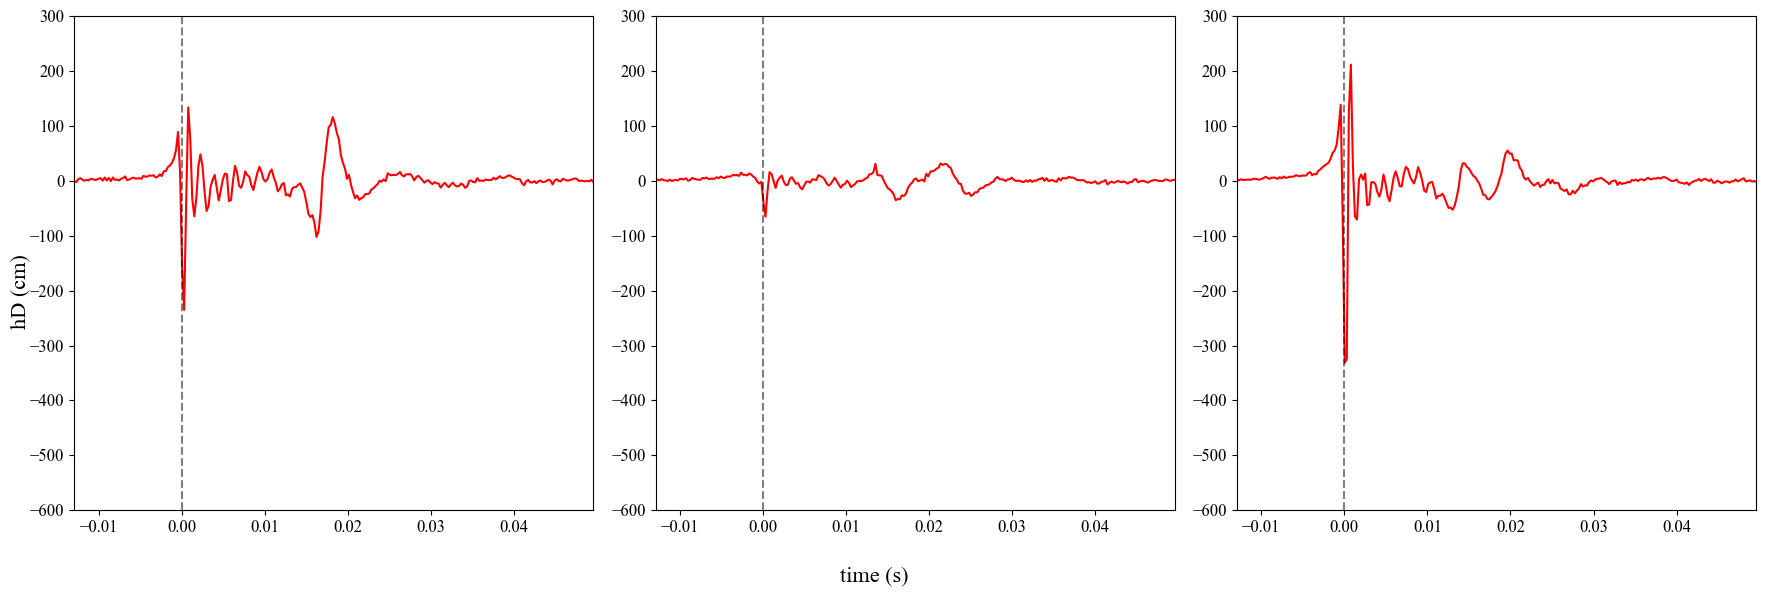

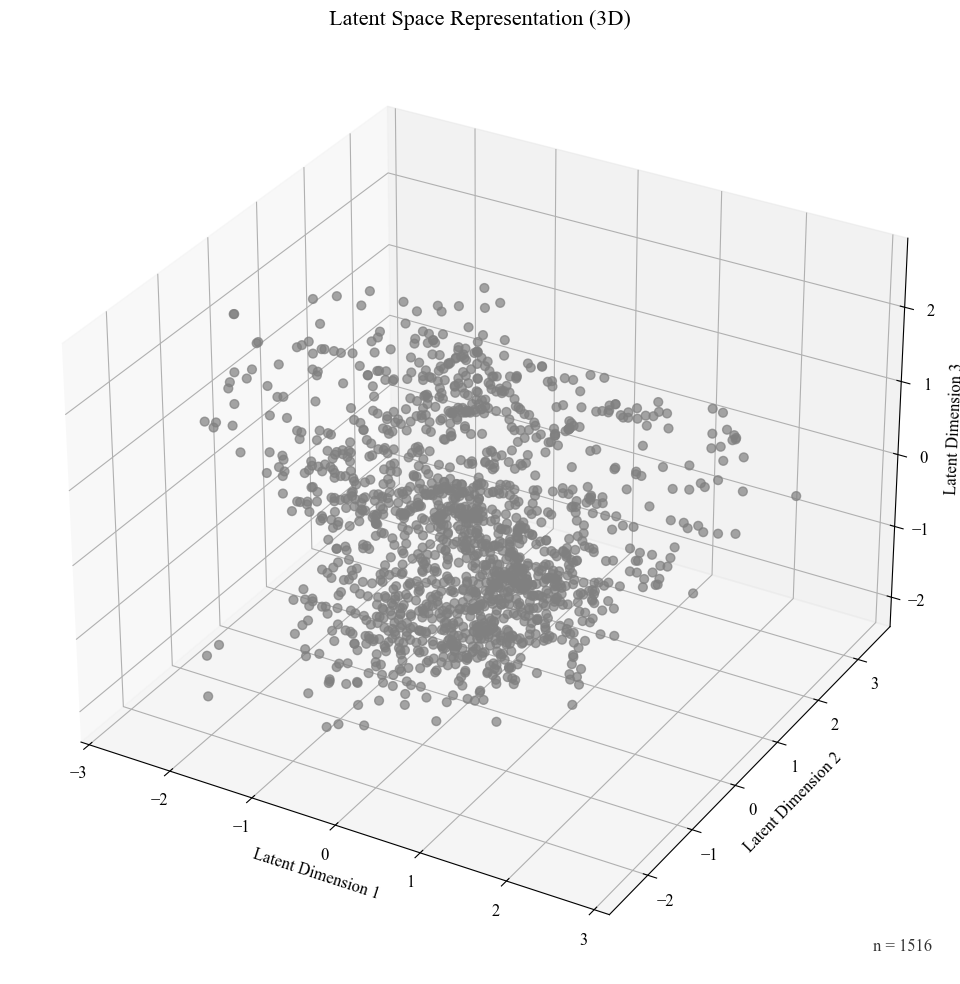

Epochs:  25%|██▍       | 63/256 [02:36<07:51,  2.44s/it]

Generated signals shape: (32, 256)


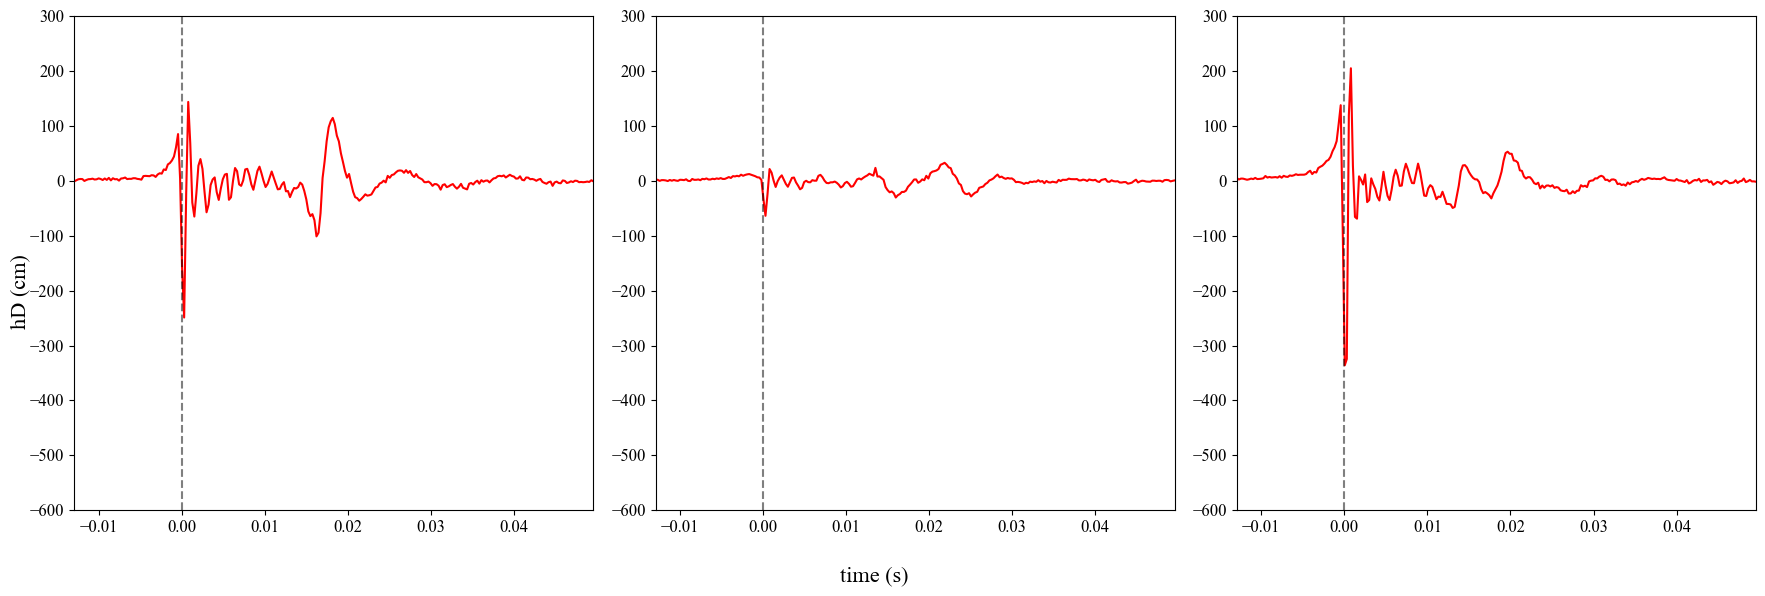

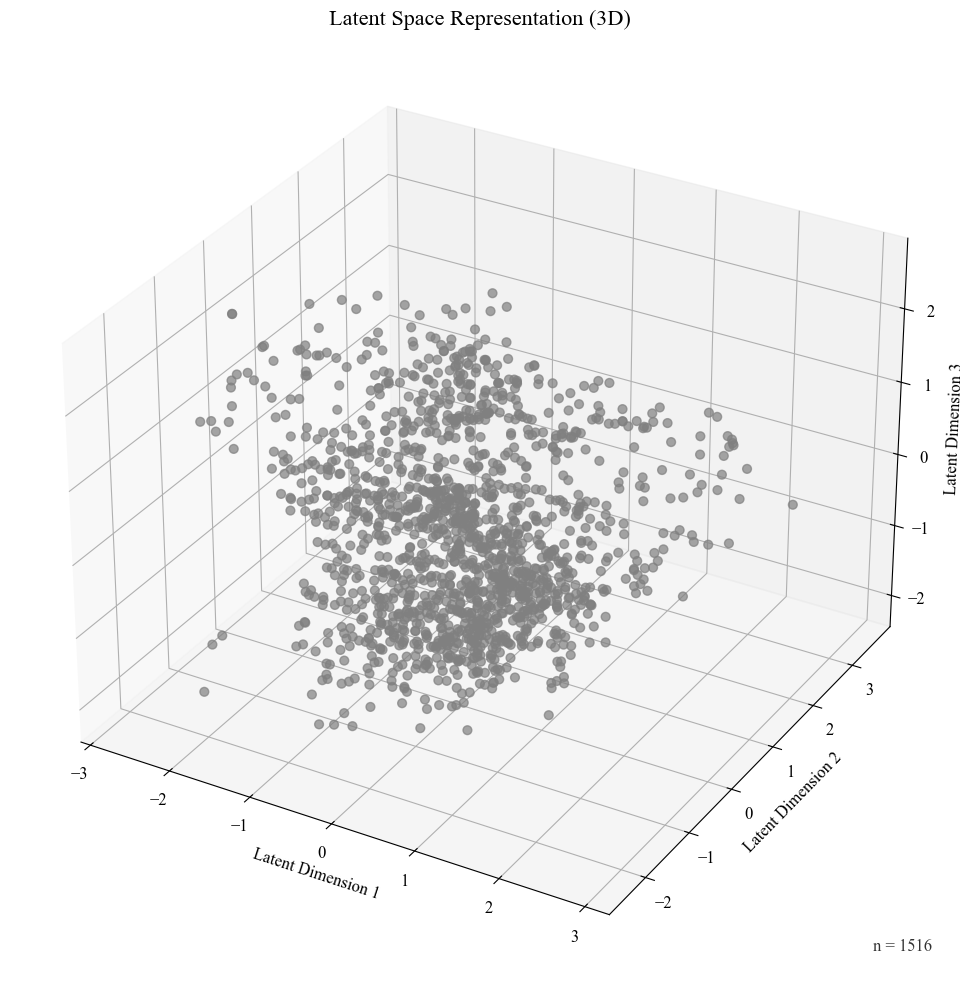

Epochs:  31%|███       | 79/256 [03:15<06:56,  2.35s/it]

Generated signals shape: (32, 256)


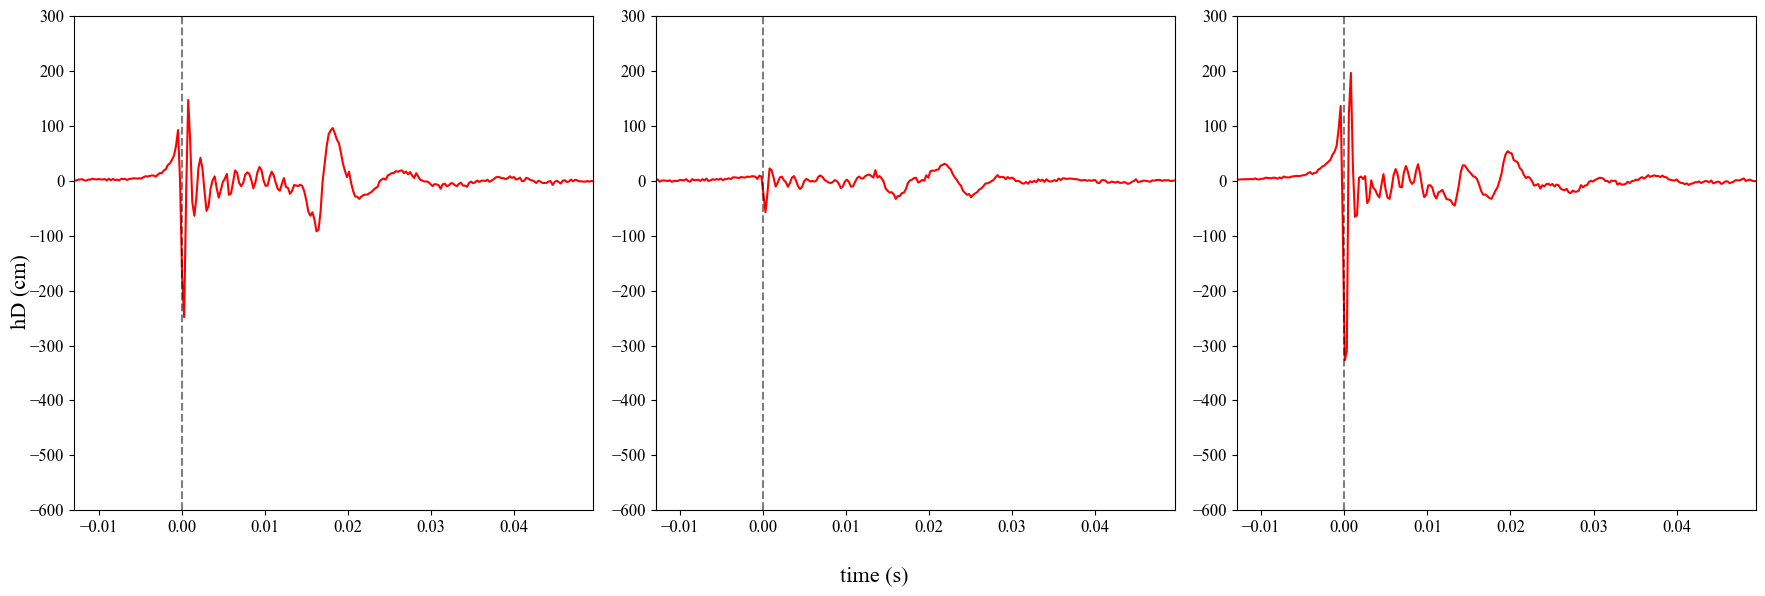

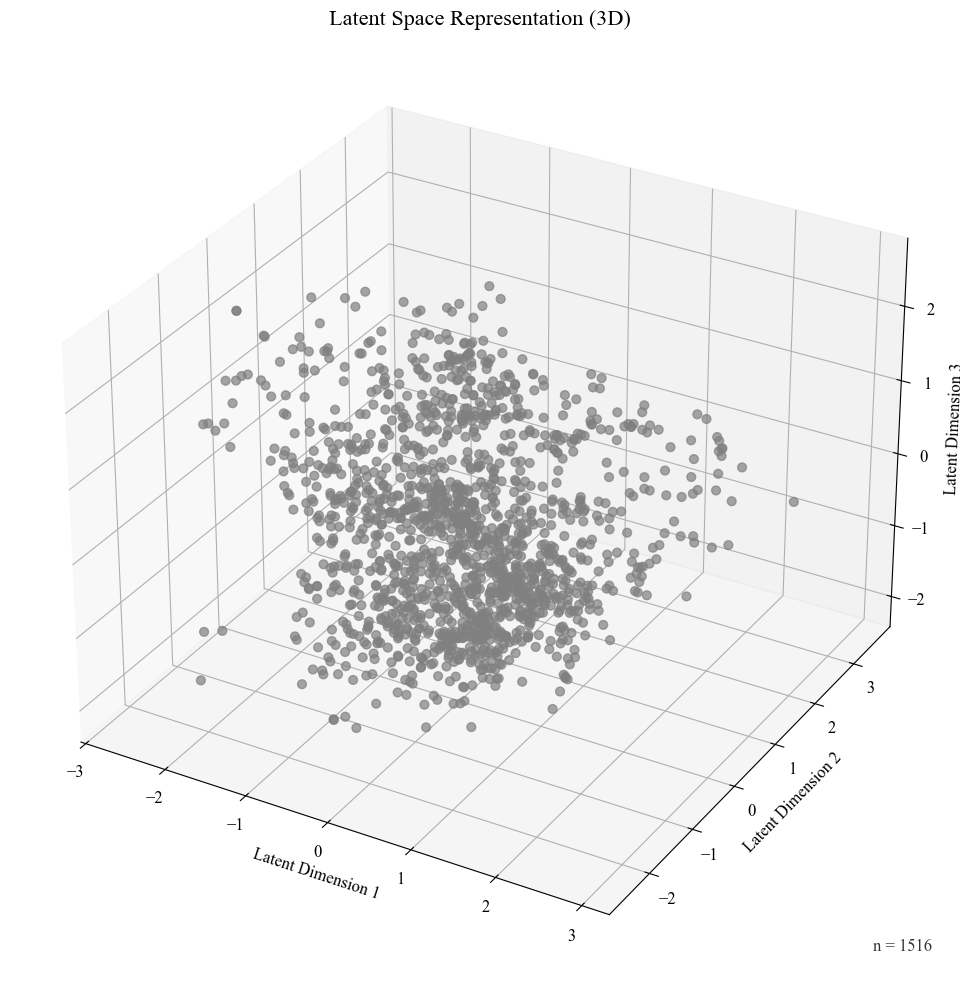

Epochs:  37%|███▋      | 95/256 [03:55<06:21,  2.37s/it]

Generated signals shape: (32, 256)


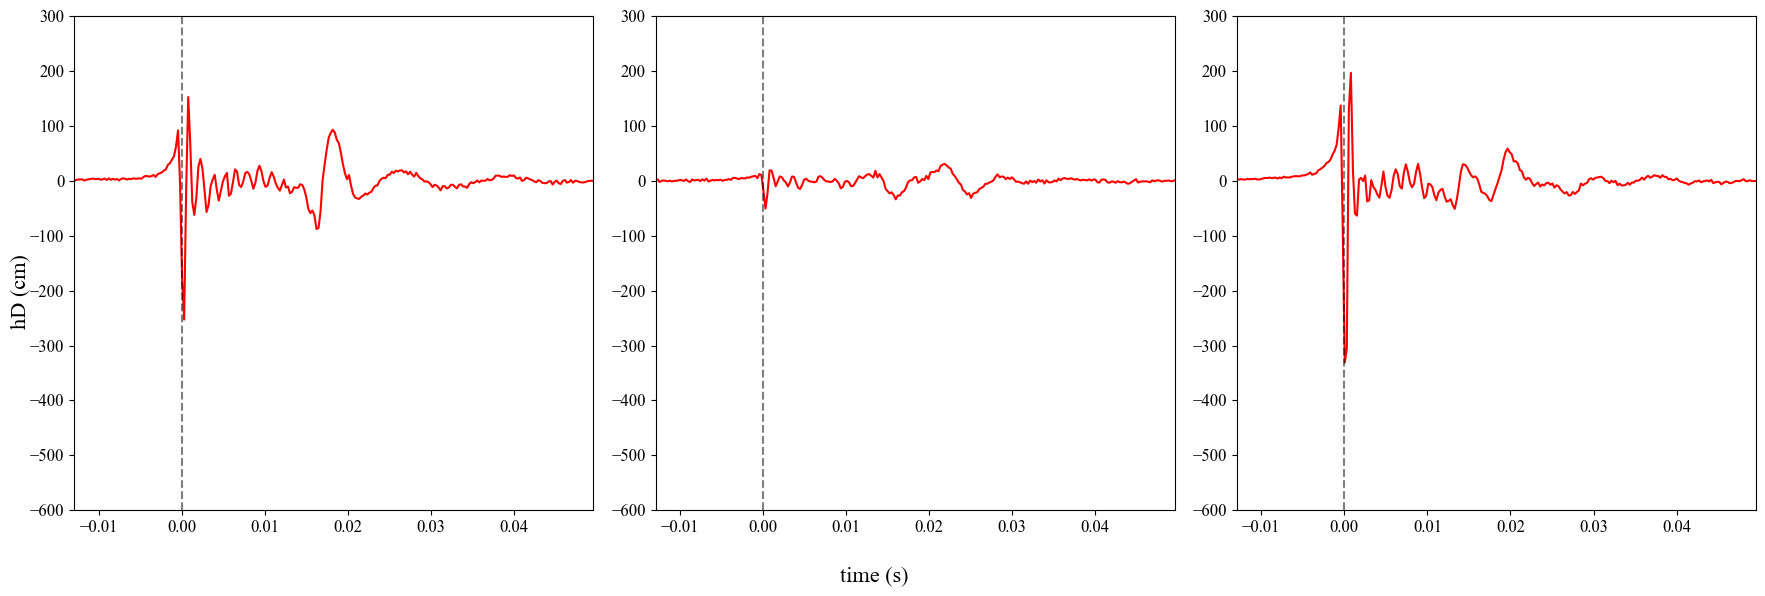

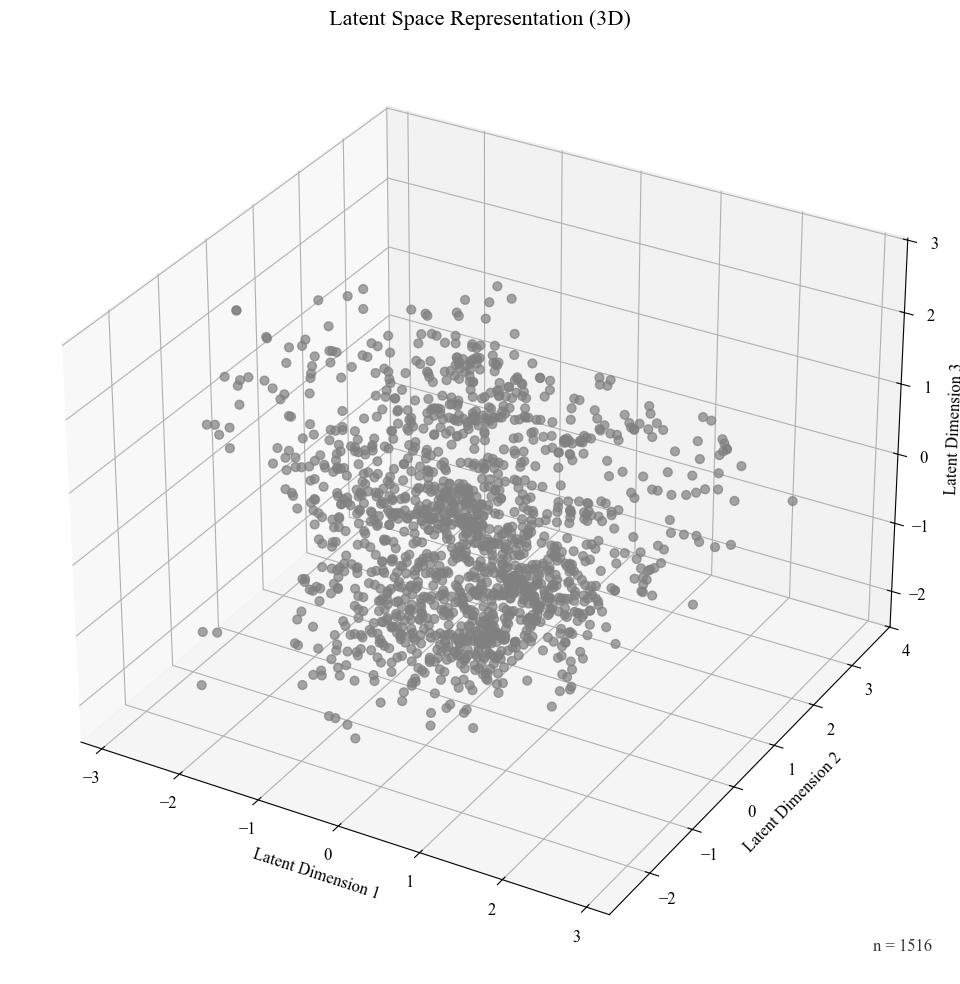

Epochs:  43%|████▎     | 111/256 [04:34<05:37,  2.32s/it]

Generated signals shape: (32, 256)


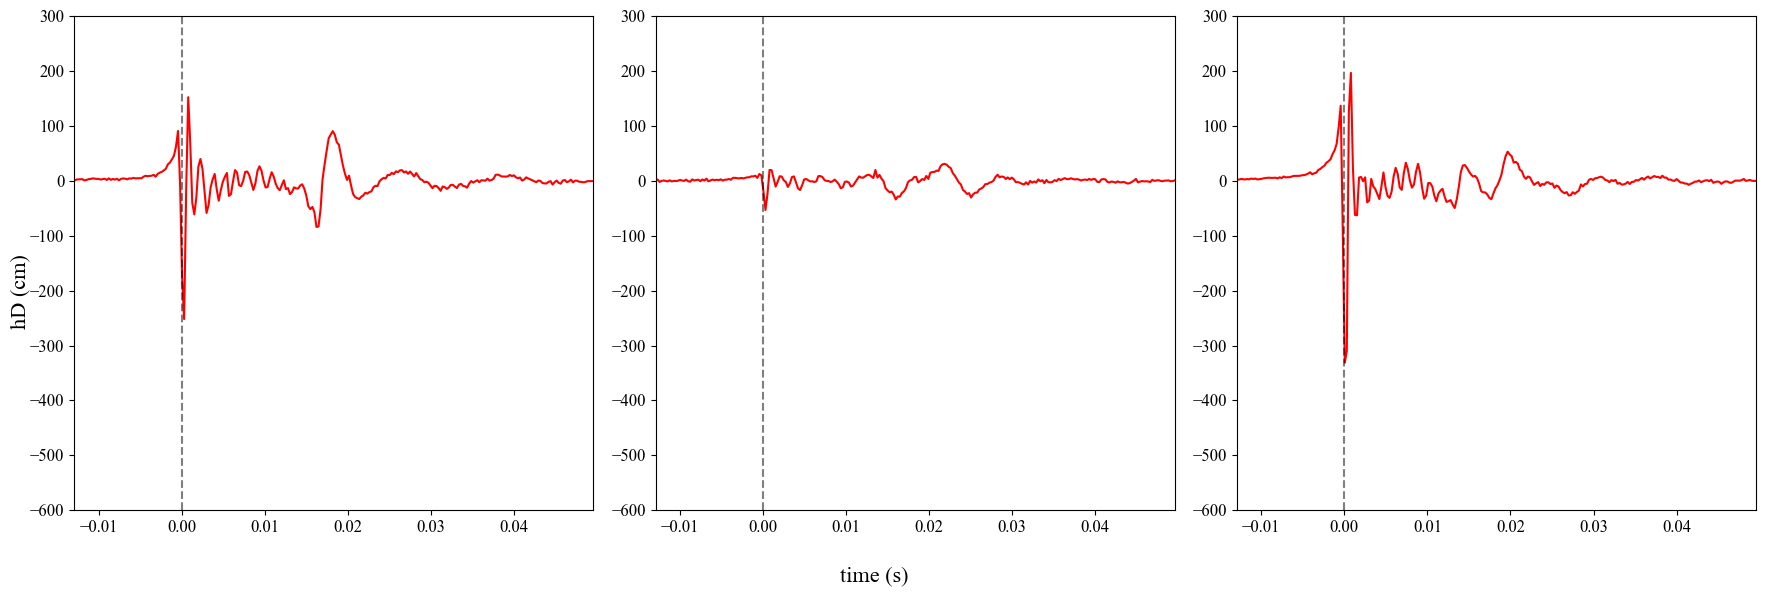

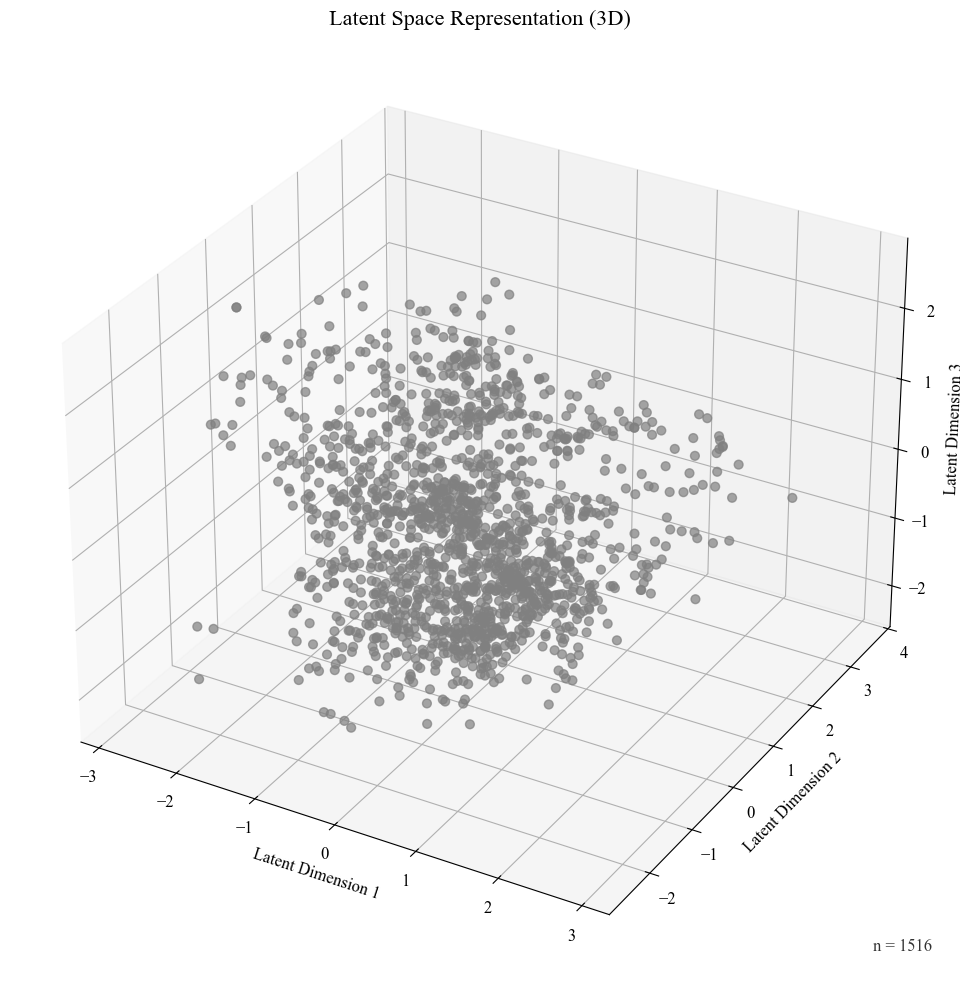

Epochs:  50%|████▉     | 127/256 [05:14<05:02,  2.34s/it]

Generated signals shape: (32, 256)


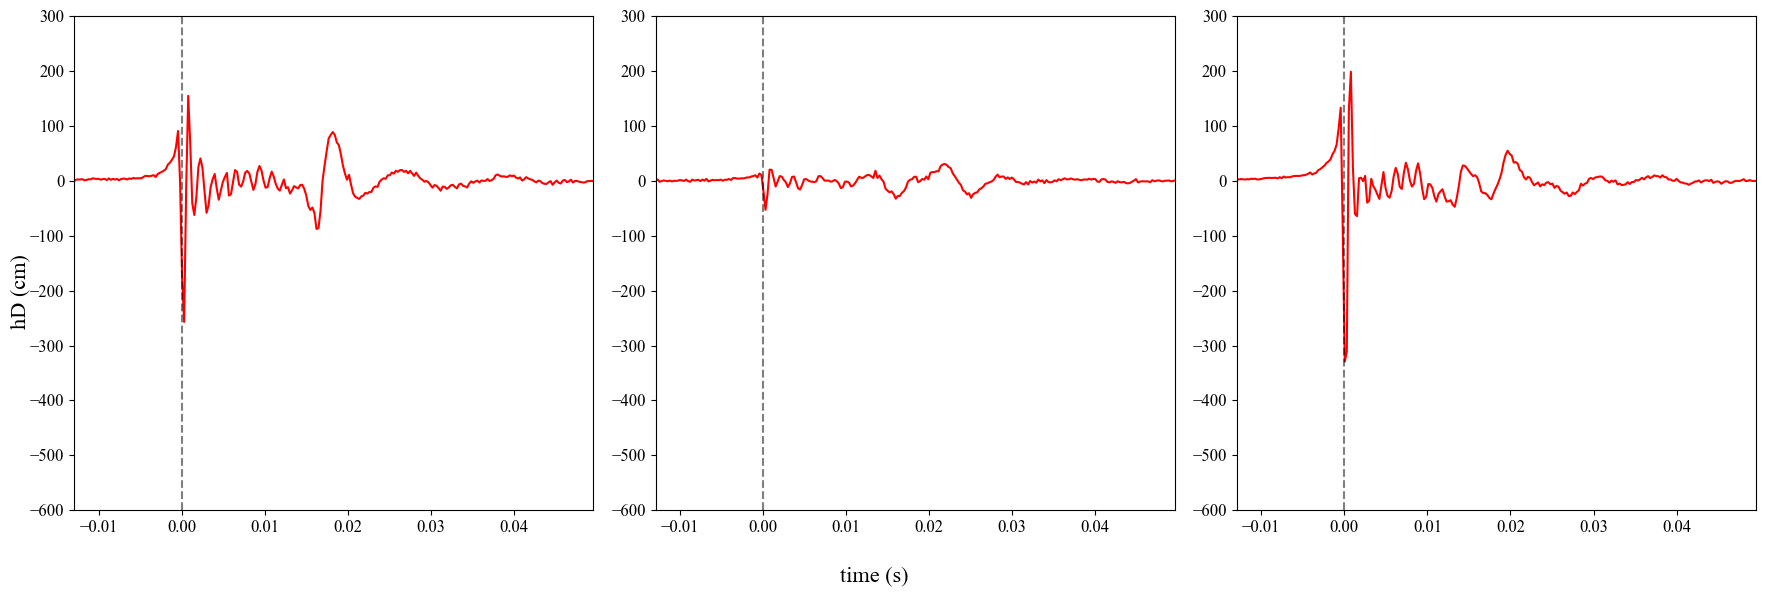

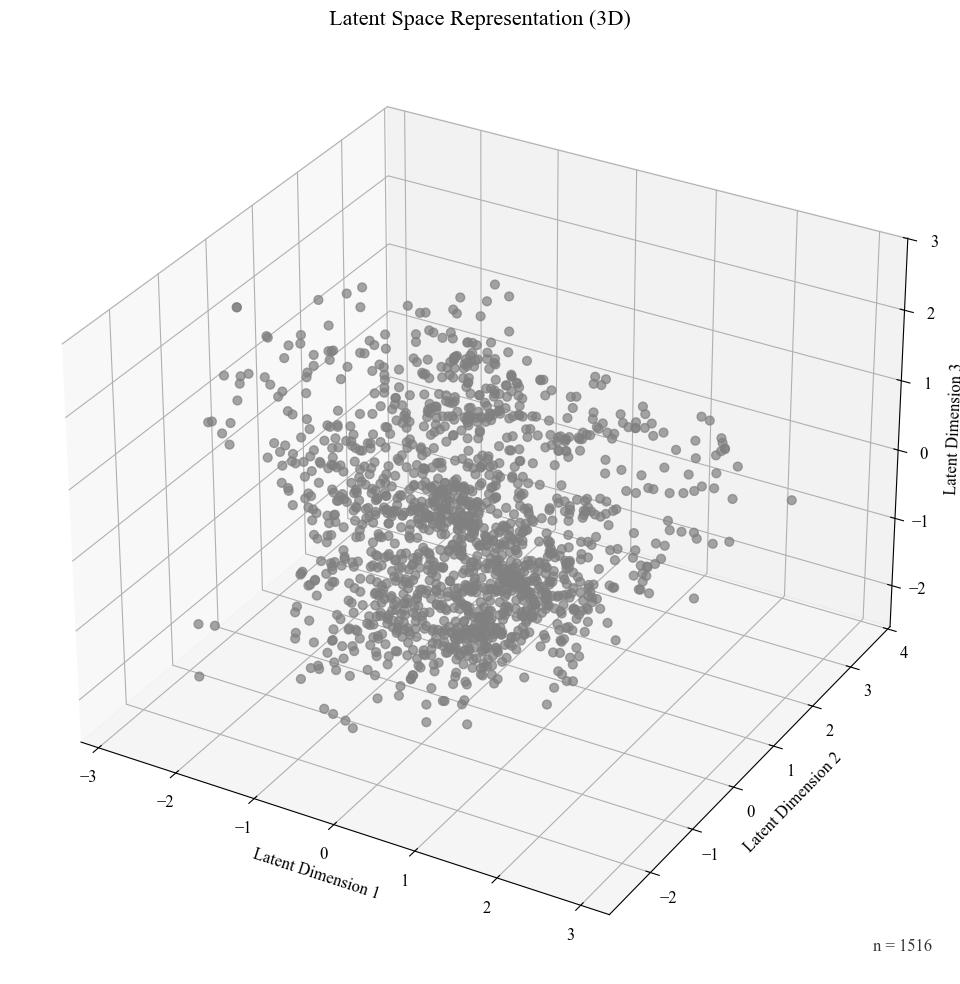

Epochs:  56%|█████▌    | 143/256 [05:54<04:31,  2.40s/it]

Generated signals shape: (32, 256)


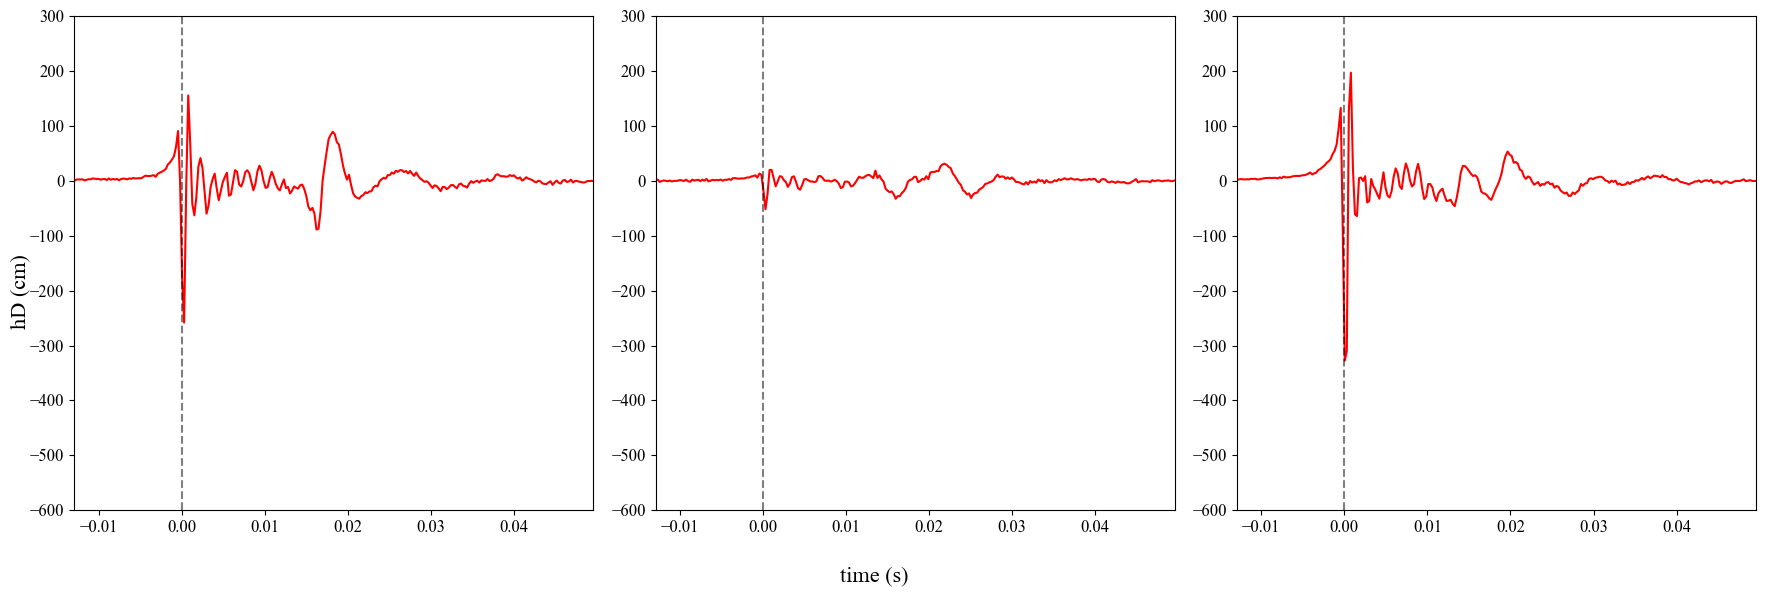

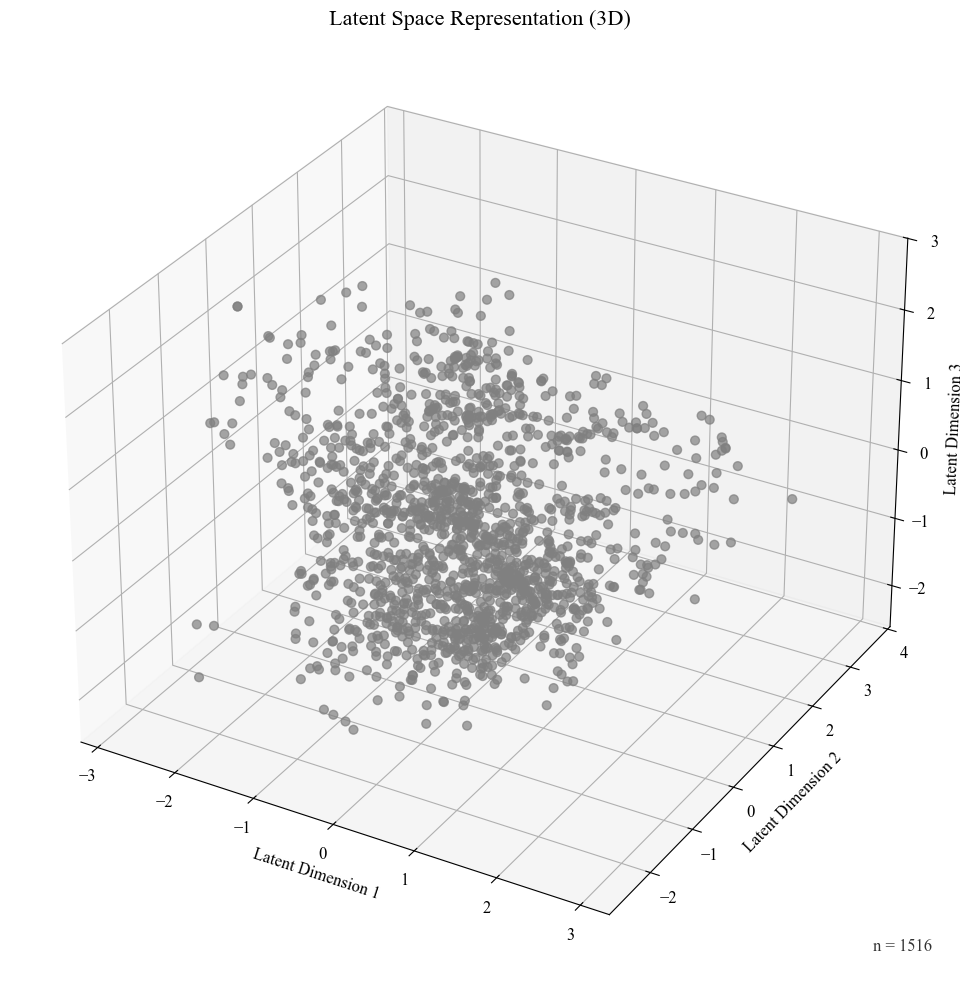

Epochs:  62%|██████▏   | 159/256 [06:35<03:51,  2.39s/it]

Generated signals shape: (32, 256)


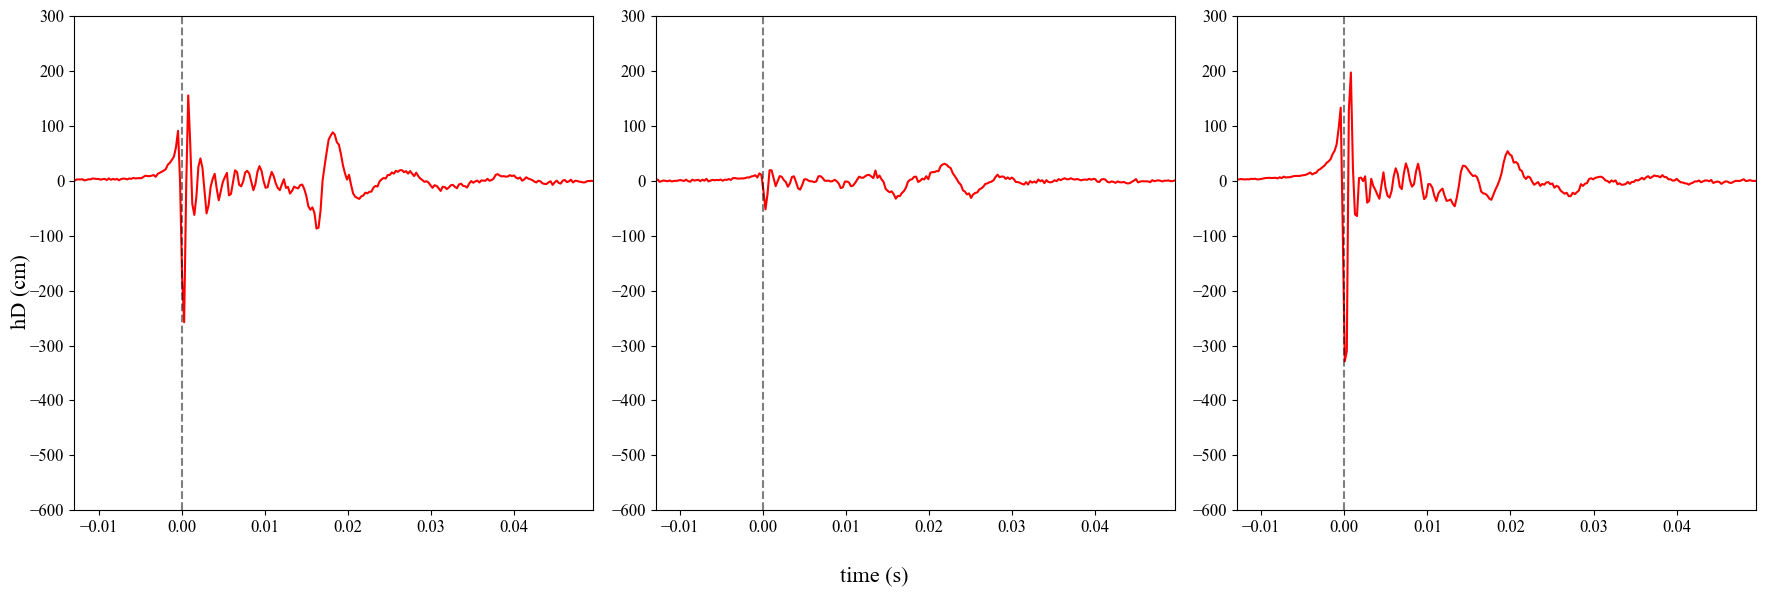

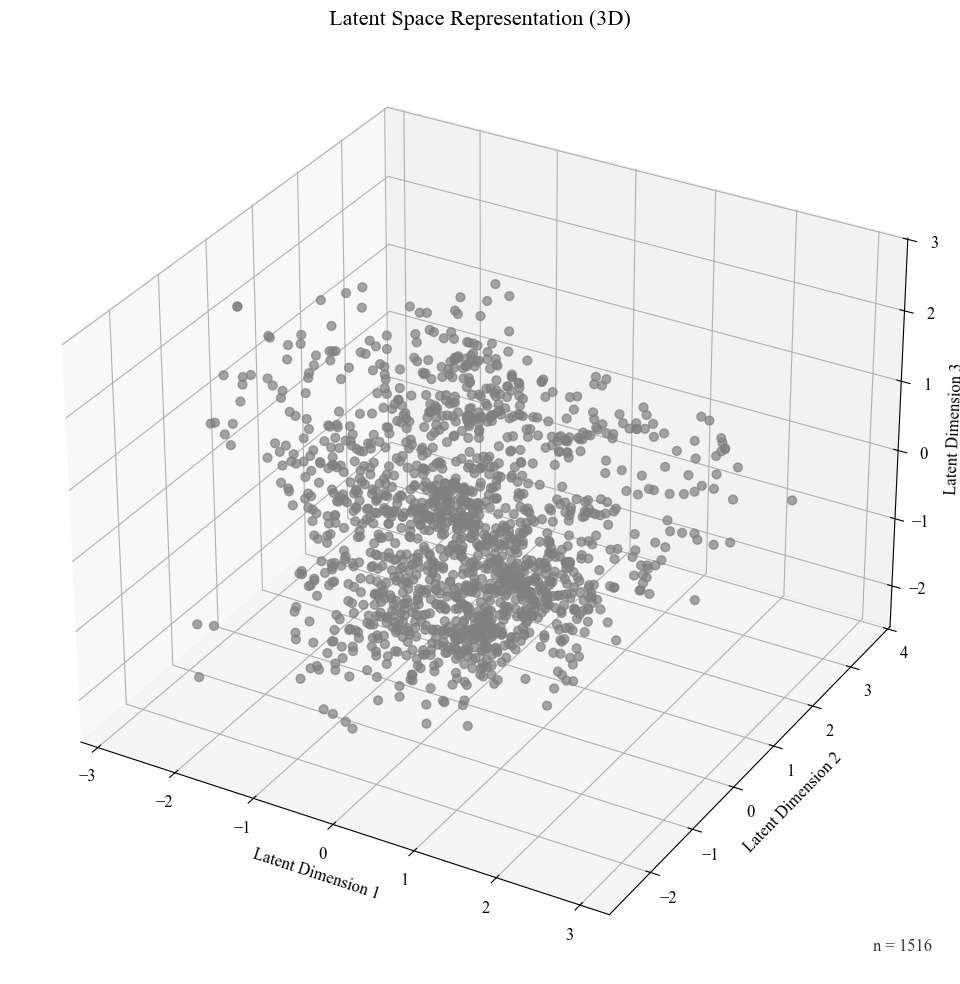

Epochs:  68%|██████▊   | 175/256 [07:14<03:06,  2.30s/it]

Generated signals shape: (32, 256)


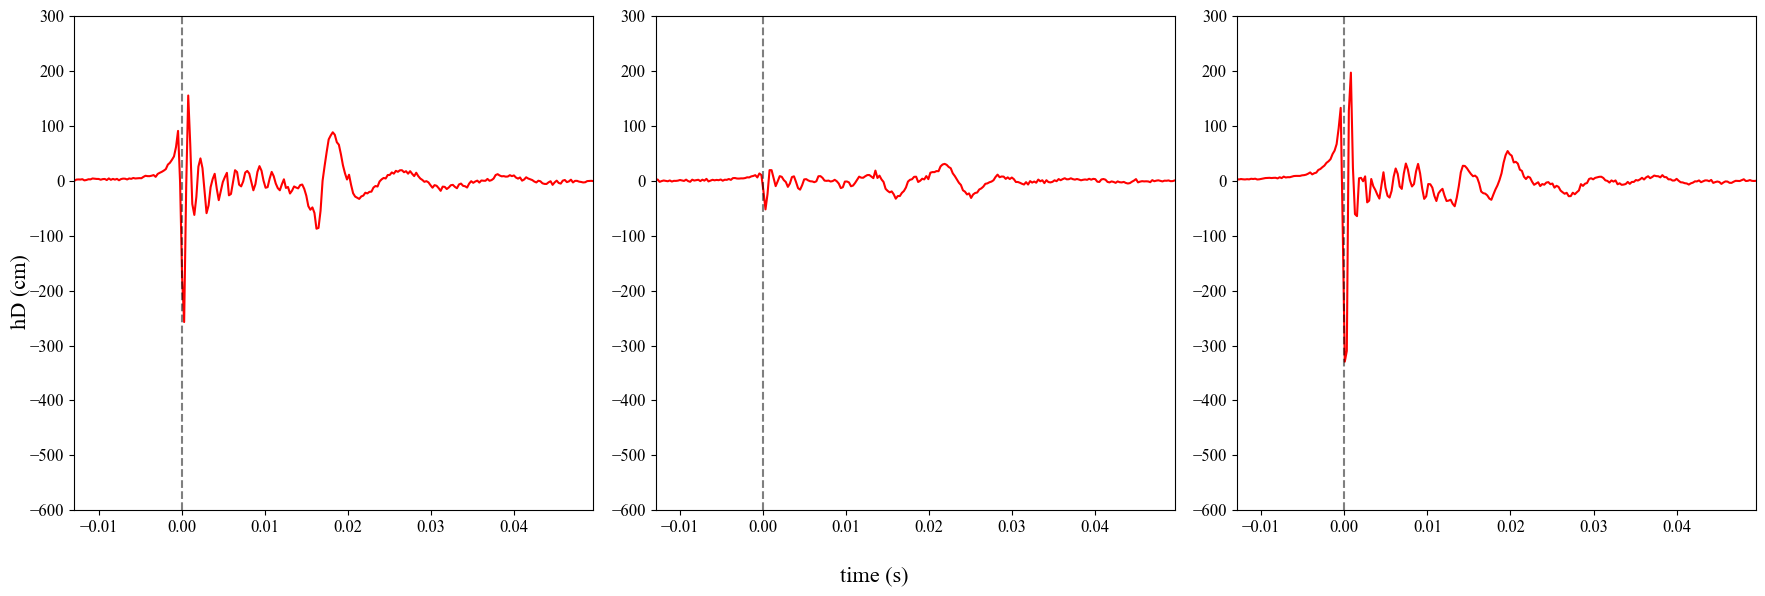

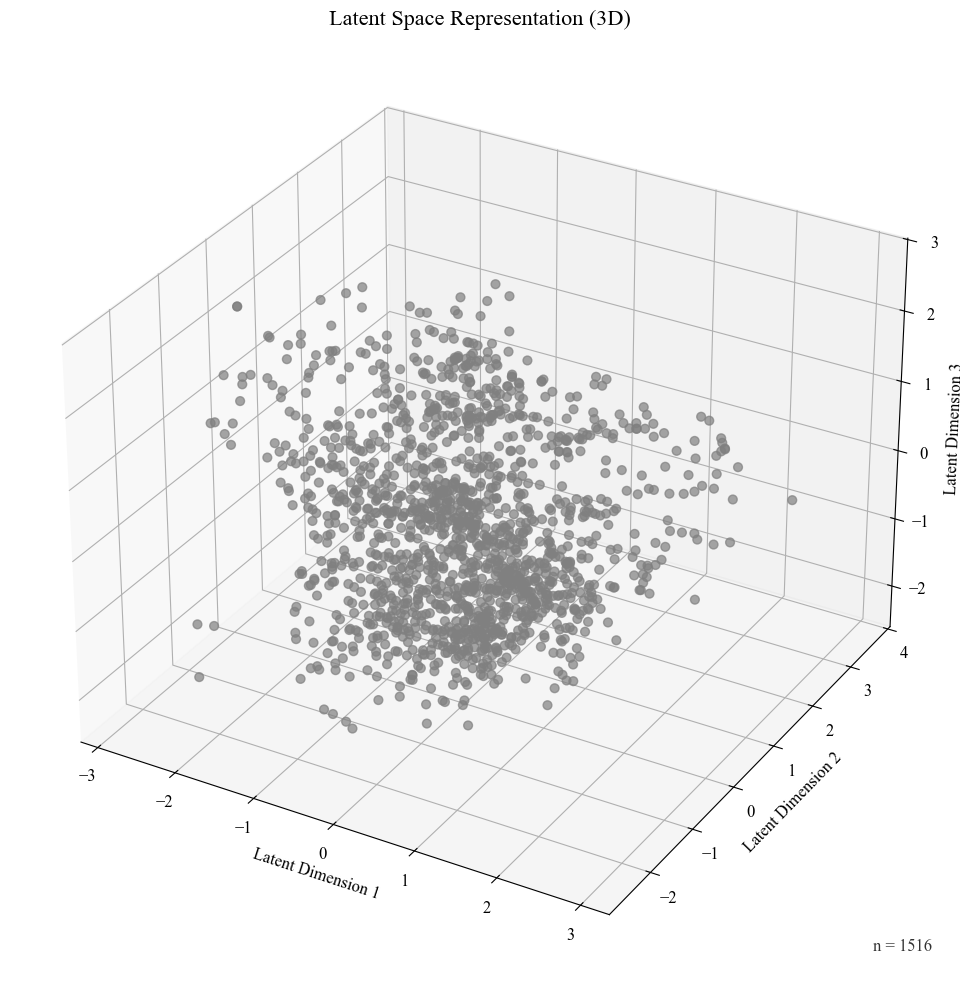

Epochs:  75%|███████▍  | 191/256 [07:54<02:34,  2.38s/it]

Generated signals shape: (32, 256)


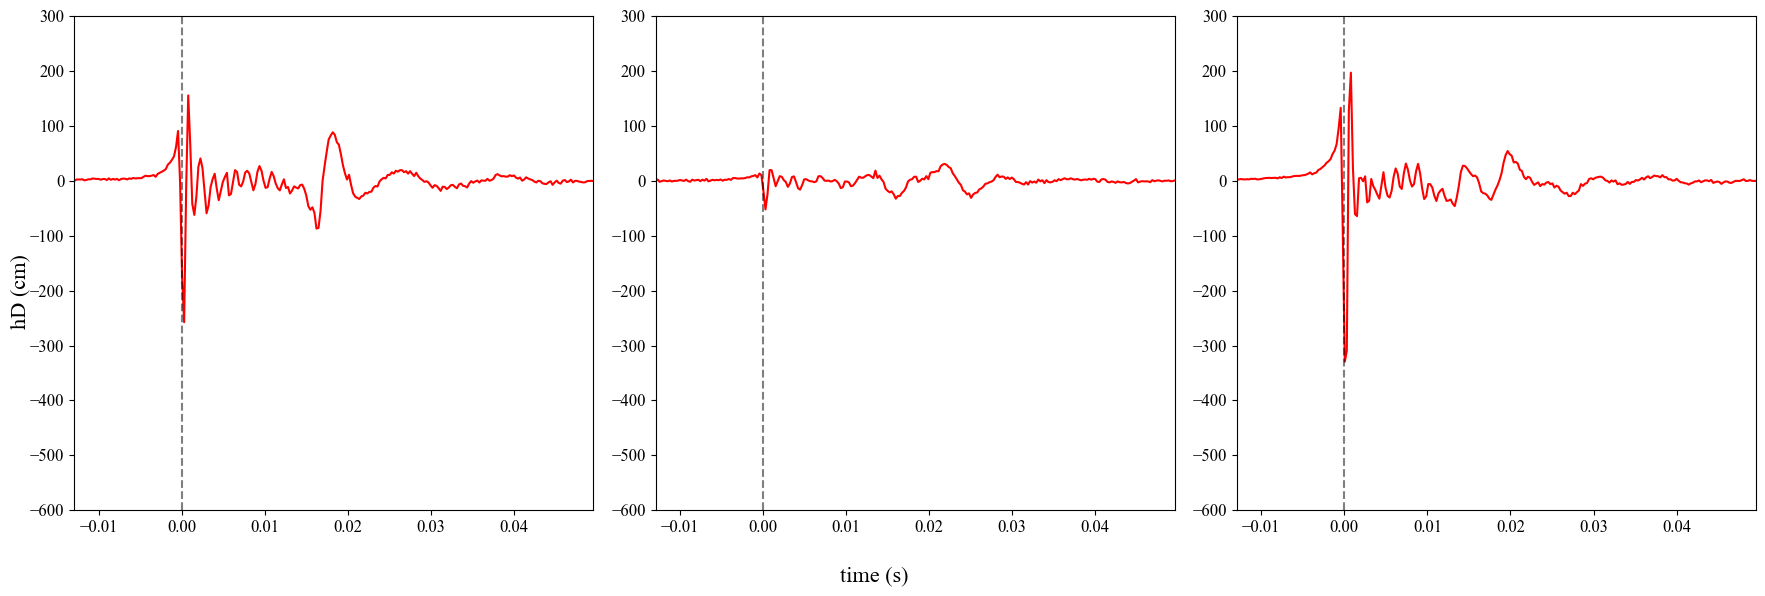

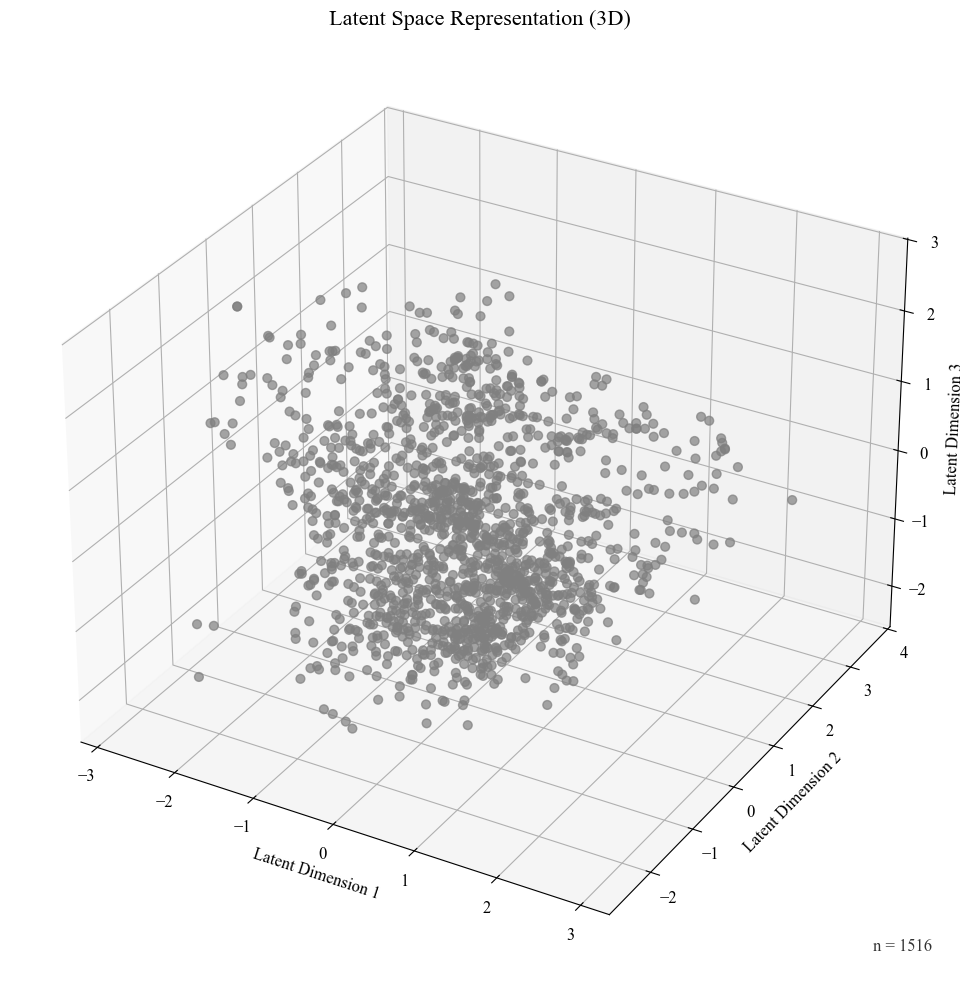

Epochs:  81%|████████  | 207/256 [08:34<01:57,  2.39s/it]

Generated signals shape: (32, 256)


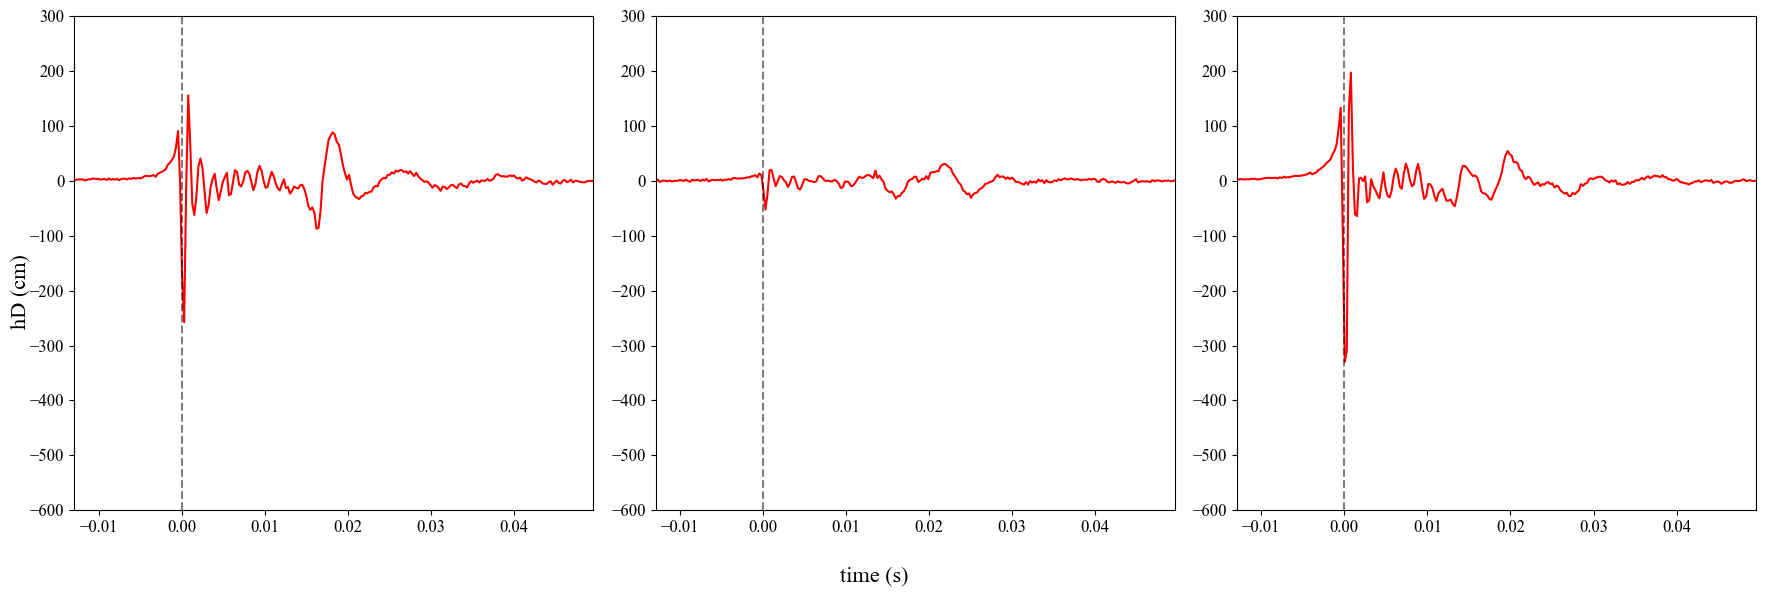

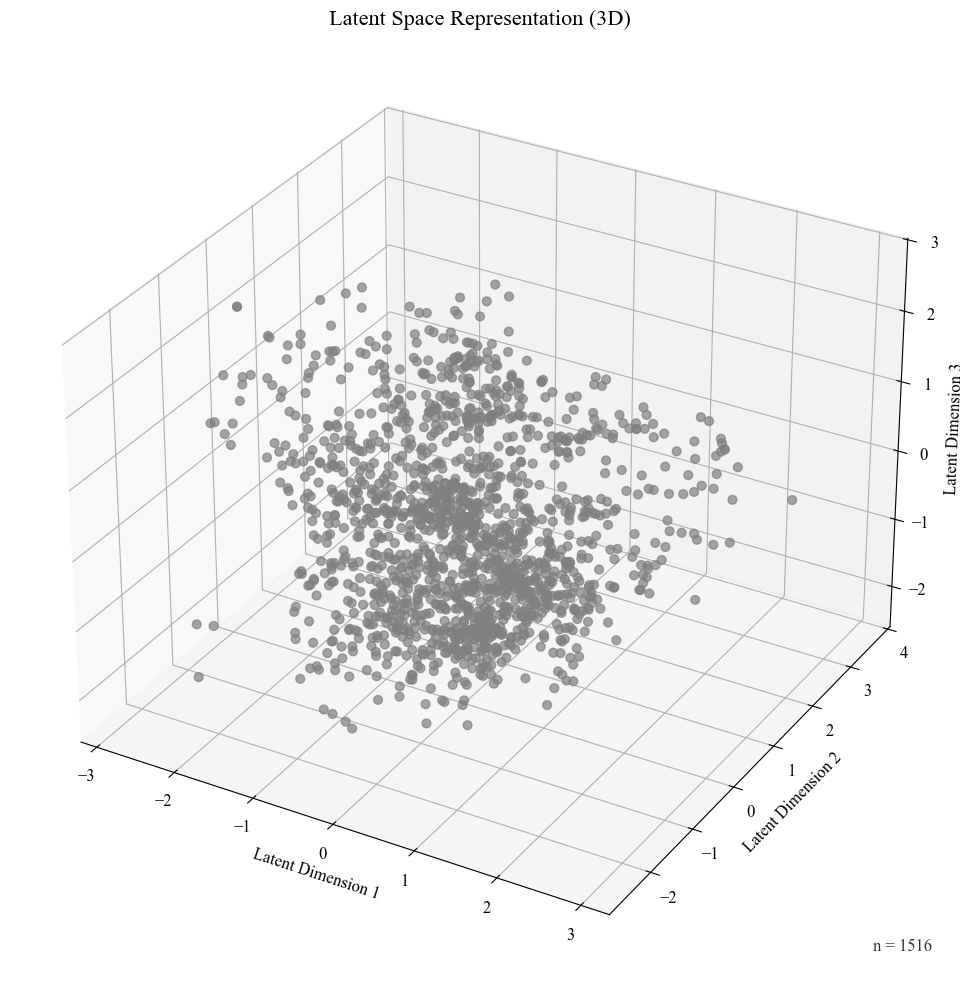

Epochs:  87%|████████▋ | 223/256 [09:12<01:16,  2.32s/it]

Generated signals shape: (32, 256)


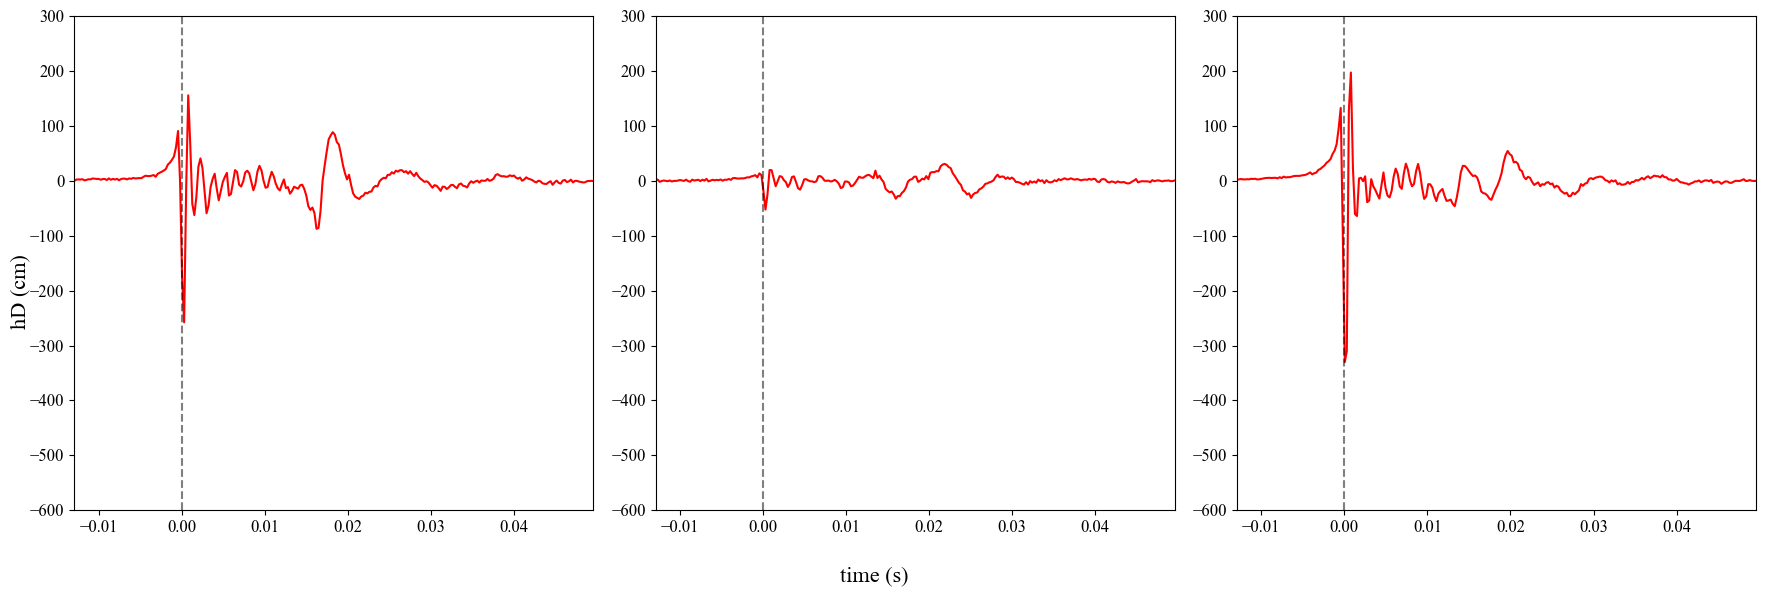

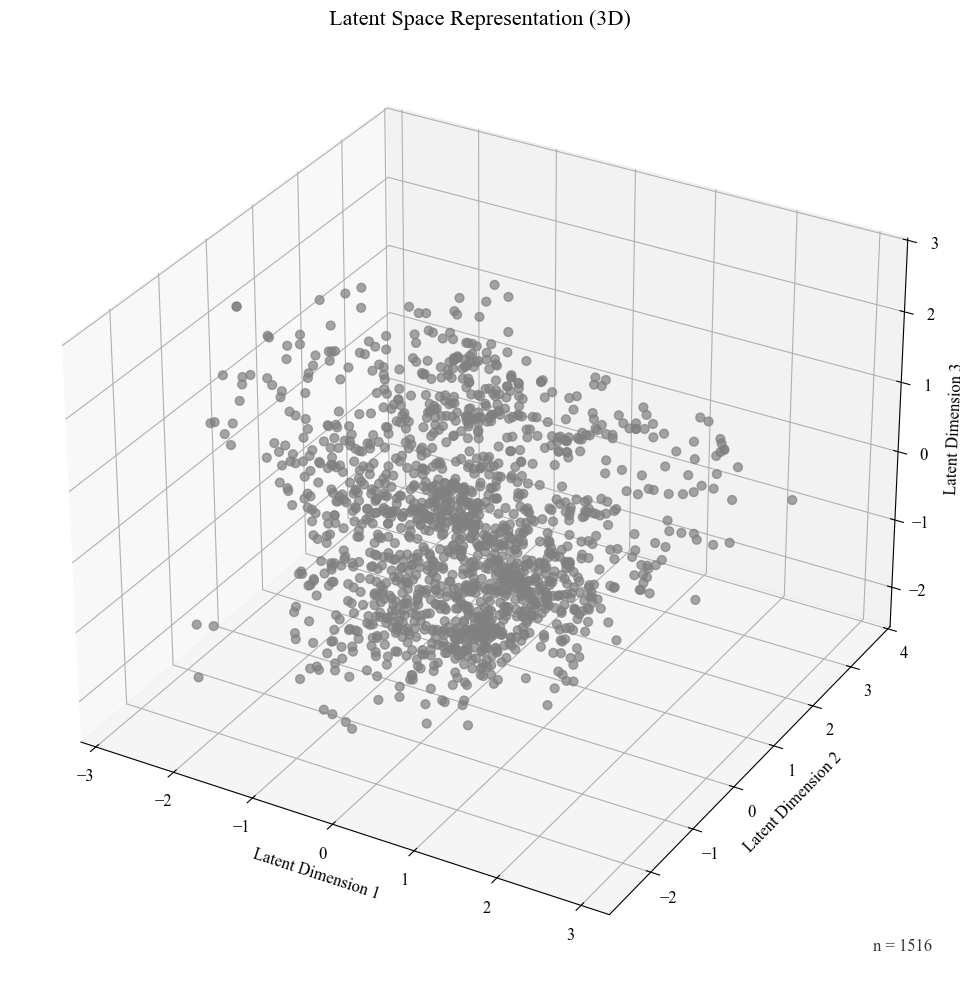

Epochs:  93%|█████████▎| 239/256 [09:51<00:37,  2.18s/it]

Generated signals shape: (32, 256)


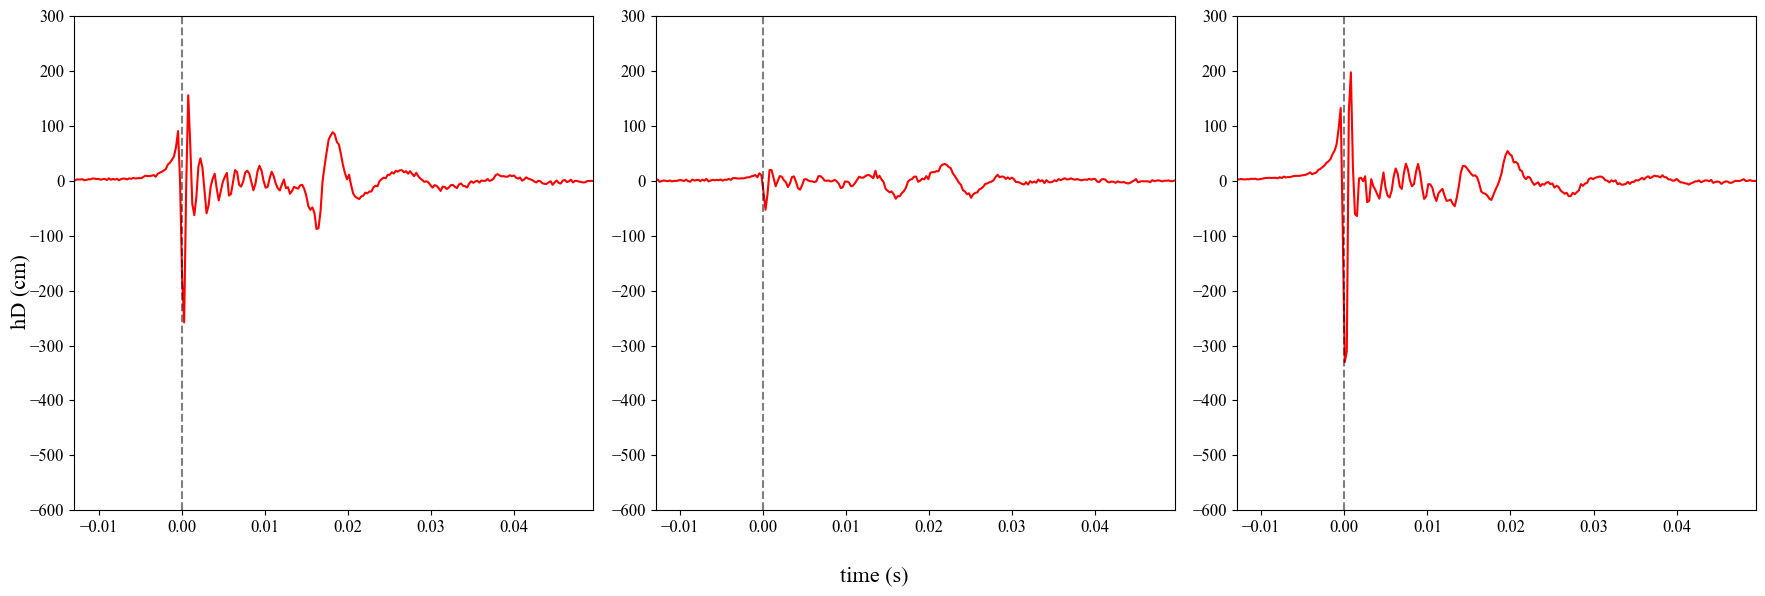

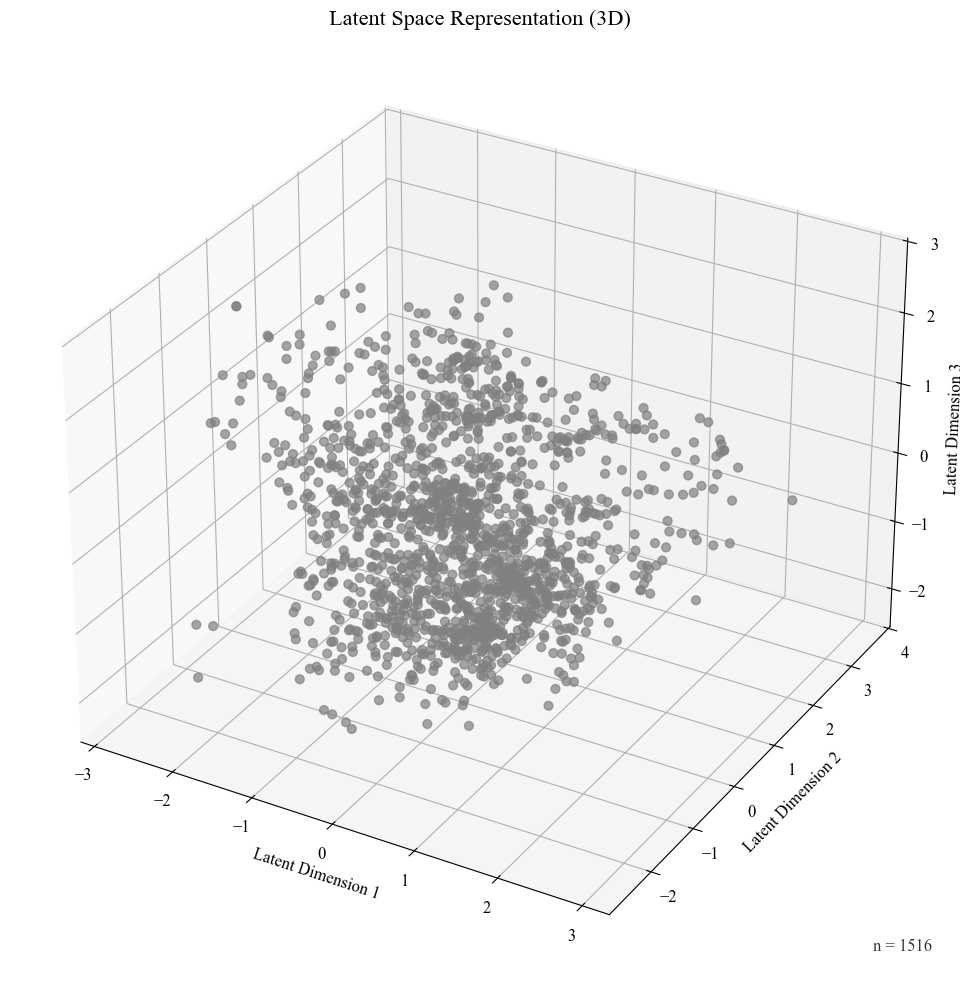

Epochs: 100%|█████████▉| 255/256 [10:29<00:02,  2.27s/it]

Generated signals shape: (32, 256)


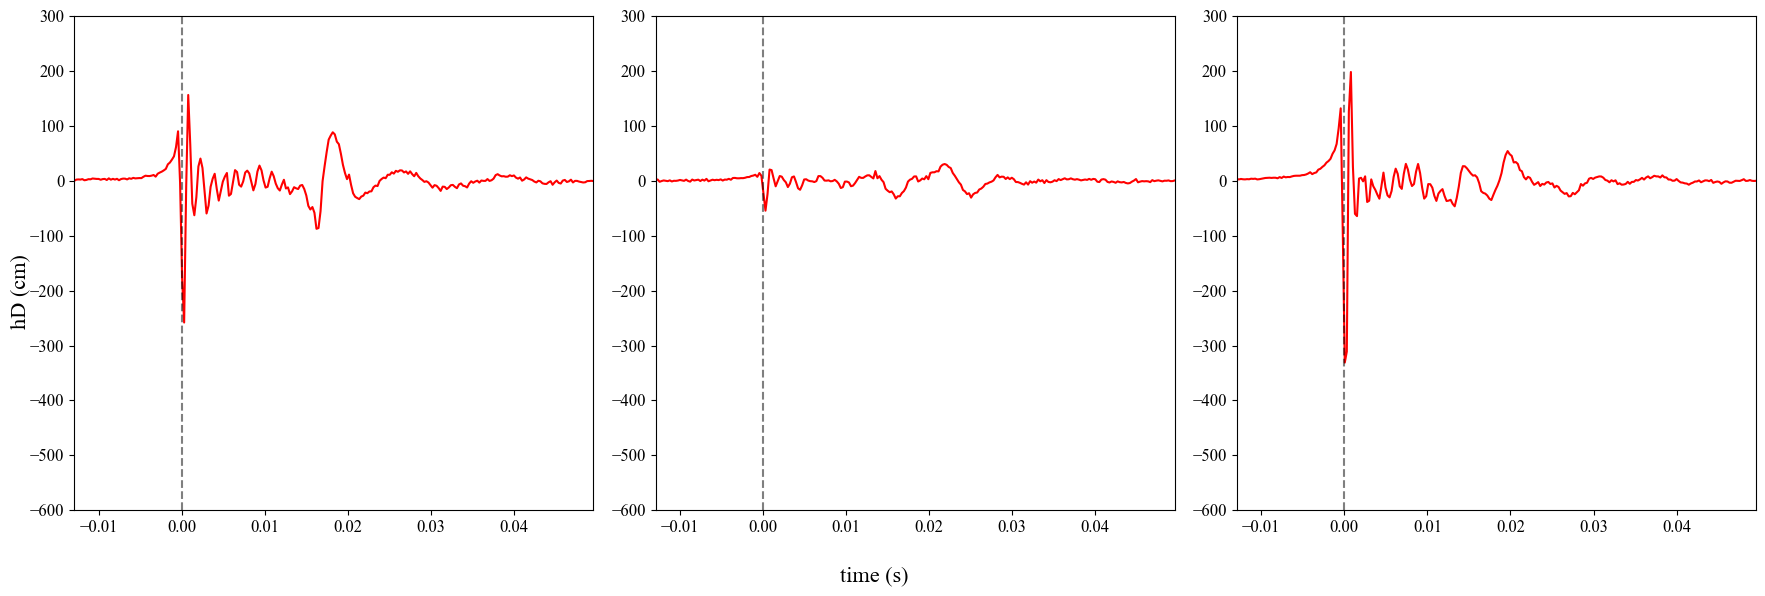

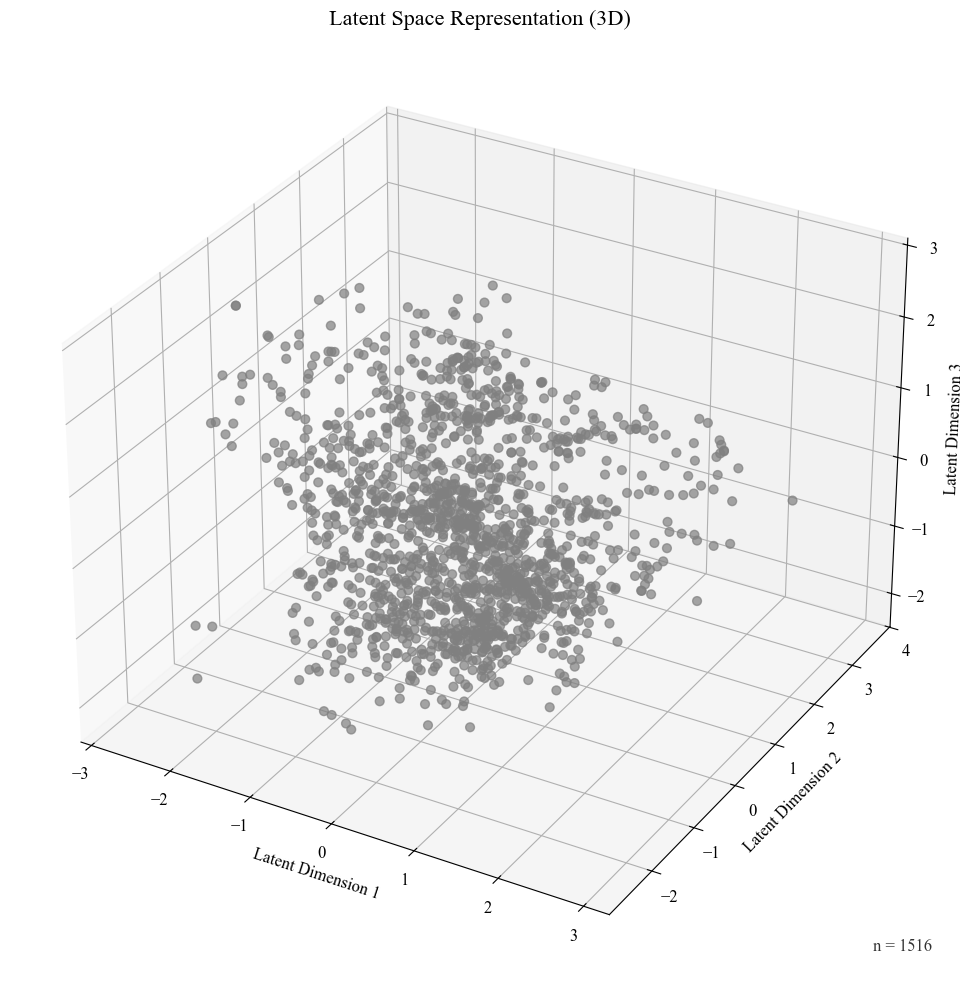

Epochs: 100%|██████████| 256/256 [10:34<00:00,  2.48s/it]


Training Time: 10.57min
Saved VAE model to outdir/generator_weights.pt

Starting Flow Training
Epoch [1/500] | Flow Train NLL: 0.3295 | Val NLL: 0.3026 | Grad Norm: 25.2951 ✓ (Best)
Epoch [2/500] | Flow Train NLL: 0.2226 | Val NLL: 0.1891 | Grad Norm: 17.1473 ✓ (Best)
Epoch [3/500] | Flow Train NLL: 0.1407 | Val NLL: 0.1357 | Grad Norm: 122.6664 ✓ (Best)
Epoch [4/500] | Flow Train NLL: 0.1203 | Val NLL: 0.1432 | Grad Norm: 255.9466 (Patience: 1/20)
Epoch [5/500] | Flow Train NLL: 0.1195 | Val NLL: 0.1171 | Grad Norm: 522.6147 ✓ (Best)
Epoch [6/500] | Flow Train NLL: 0.1047 | Val NLL: 0.1241 | Grad Norm: 388.3971 (Patience: 1/20)
Epoch [7/500] | Flow Train NLL: 0.1060 | Val NLL: 0.1057 | Grad Norm: 458.5871 ✓ (Best)
Epoch [8/500] | Flow Train NLL: 0.0933 | Val NLL: 0.0978 | Grad Norm: 304.3639 ✓ (Best)
Epoch [9/500] | Flow Train NLL: 0.0853 | Val NLL: 0.0971 | Grad Norm: 282.6994 ✓ (Best)
Epoch [10/500] | Flow Train NLL: 0.0757 | Val NLL: 0.0831 | Grad Norm: 255.6056 ✓ (Best)
Epoch [11/

In [7]:
trainer.train()


Plotting Flow NLL Losses...

Plotting Flow Gradient Norms...


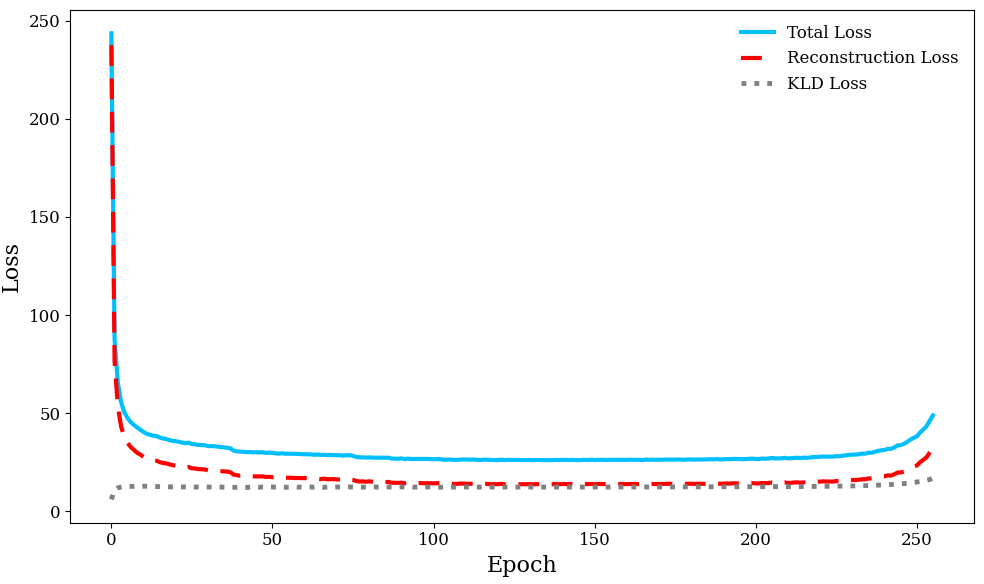

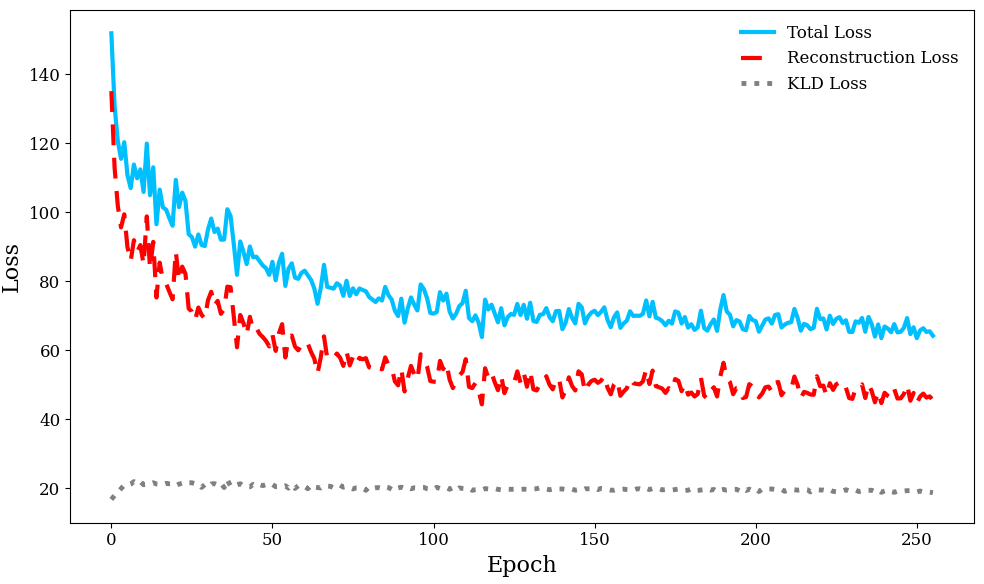

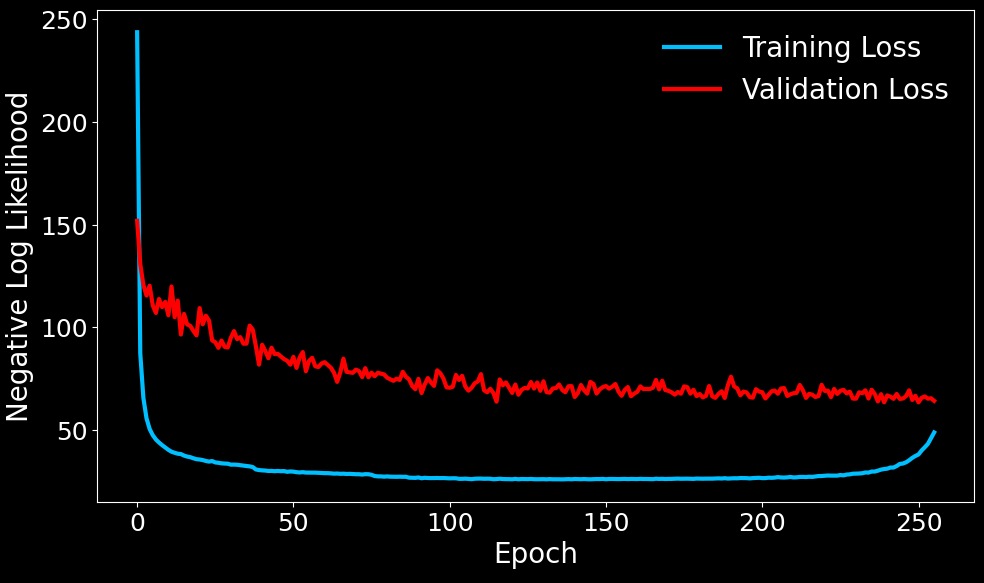

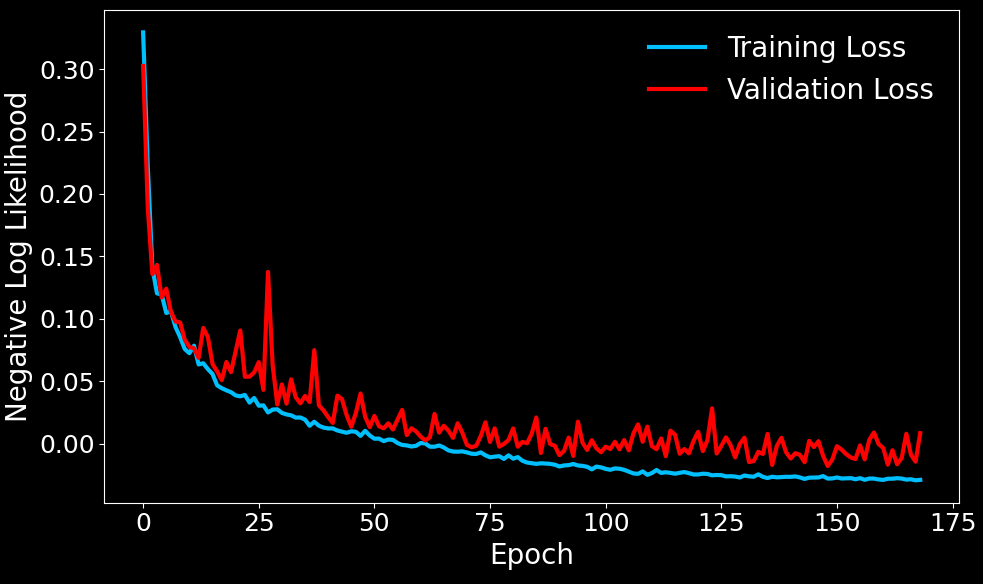

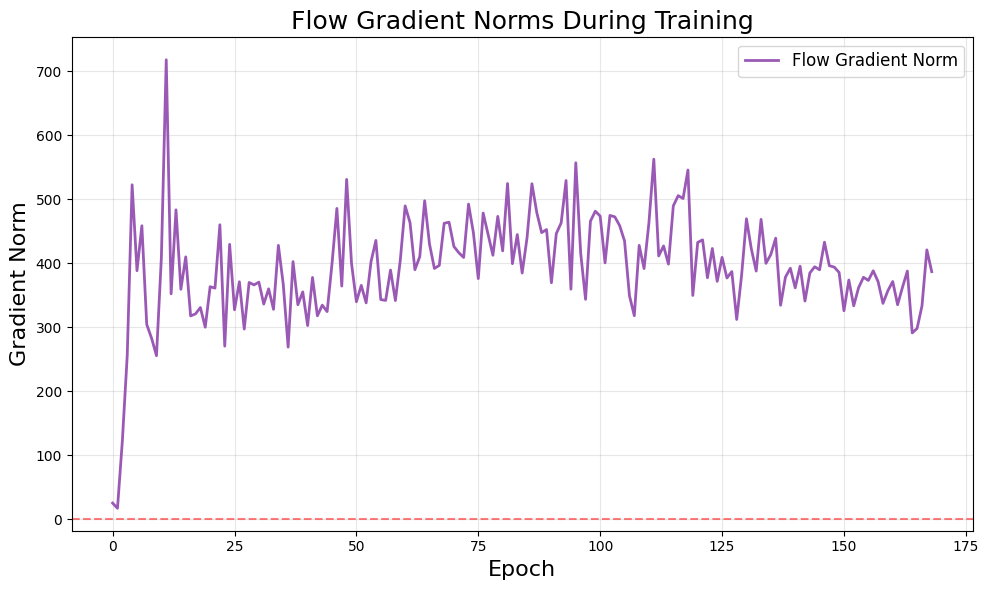

In [8]:
trainer.display_results()

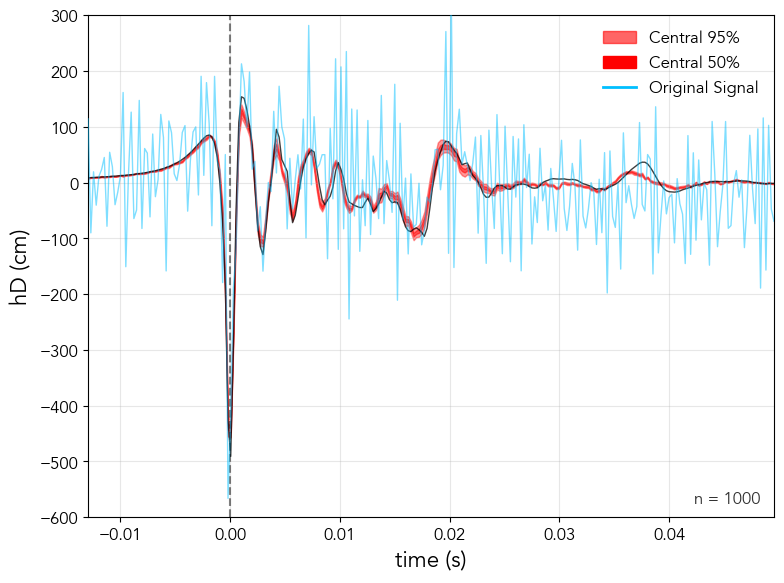

In [9]:
index = 160
trainer.val_loader.dataset.update_snr(30)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(index)

trainer.plot_reconstruction_distribution(
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

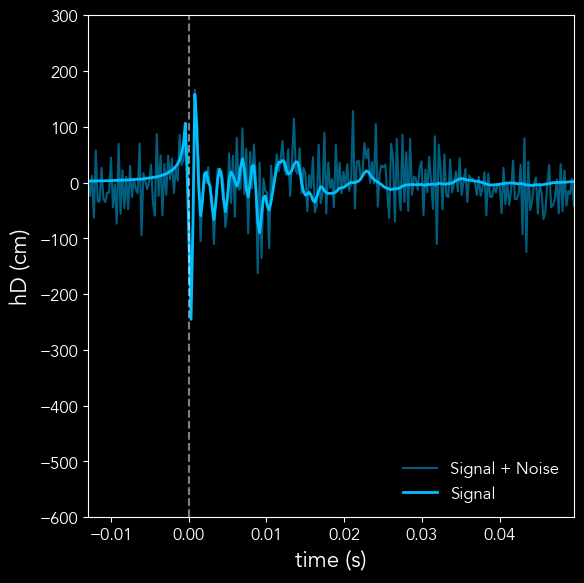

True params: tensor([0.0477, 4.0000, 6.4520, 0.2796])
[0.04772567 4.         6.452049   0.27955988]


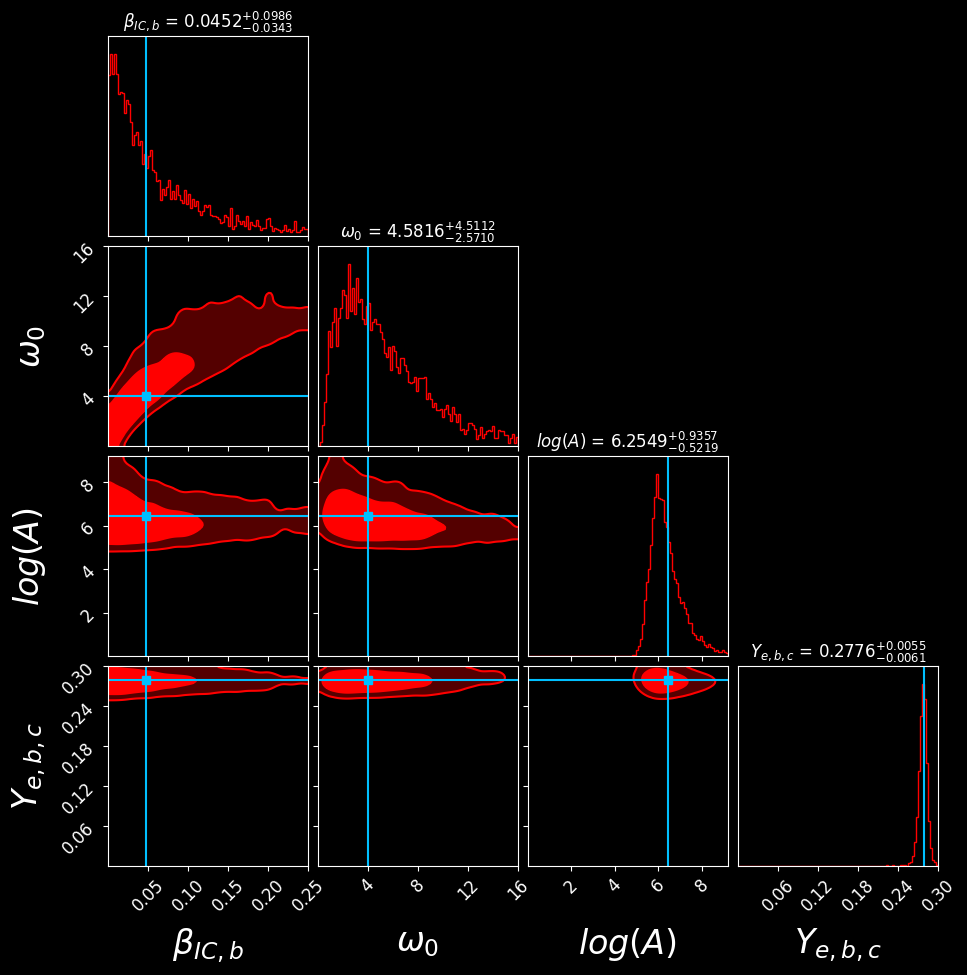

In [18]:
trainer.val_loader.dataset.update_snr(20)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(9)
plot_candidate_signal(noisy_signal=noisy_signal, signal=signal, max_value=trainer.validation_dataset.max_strain, fname="plots/candidate_signal.svg", background="black")
trainer.plot_corner(signal=signal, noisy_signal=noisy_signal, params=params, fname="plots/corner_plot.svg")

In [11]:
# Check 2: Does the flow produce different posteriors for different latents?
print("\n" + "=" * 60)
print("DIAGNOSTIC: Checking Flow Posterior Predictions")
print("=" * 60)

num_samples = 1000

for i, idx in enumerate(test_indices[:3]):  # Test 3 signals
    signal, noisy_signal, params = trainer.training_dataset[idx]
    
    # Encode to latent (data is already tensor from dataset)
    with torch.no_grad():
        if isinstance(noisy_signal, np.ndarray):
            noisy_signal_tensor = torch.from_numpy(noisy_signal).unsqueeze(0).to(DEVICE)
        else:
            noisy_signal_tensor = noisy_signal.unsqueeze(0).to(DEVICE)
            
        _, mean, _ = trainer.vae(noisy_signal_tensor)
        z_latent = mean.view(1, -1)
        
        # Sample from flow conditioned on this latent
        samples = trainer.flow.sample(num_samples, context=z_latent).cpu().numpy()
        samples = np.exp(samples) - 1e-8  # Reverse log transform
    
    # Convert params to numpy if needed
    if isinstance(params, torch.Tensor):
        params = params.cpu().numpy()
    
    print(f"\nSignal {idx}:")
    print(f"  True params: {params.flatten()}")
    print(f"  Predicted mean: {samples.mean(axis=0)}")
    print(f"  Predicted std:  {samples.std(axis=0)}")

print("\n" + "=" * 60)
print("If predicted means are all similar, flow is NOT conditioning properly!")
print("=" * 60)


DIAGNOSTIC: Checking Flow Posterior Predictions


NameError: name 'test_indices' is not defined